In [ ]:
pip install kmapper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
pip install pyballmapper

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm
import networkx as nx

# Data Pre-processing

## Upload data

In [ ]:
se_education = pd.read_csv('/content/se_ed.csv')
se_income = pd.read_csv('/content/se_dep.csv')
se_NSSEC = pd.read_csv('/content/se_NSSEC.csv')
mig = pd.read_csv('/content/mig.csv')
dem_householdage = pd.read_csv('/content/householdbyage.csv')
ge24 = pd.read_csv('/content/cleaned_ge24.csv')

In [ ]:
ge24.tail()

ConstCode              Const Region              Result First party  \
570  W07000108       Swansea West   Wales           Lab hold         Lab   
571  W07000109            Torfaen   Wales           Lab hold         Lab   
572  W07000110  Vale of Glamorgan   Wales  Lab gain from Con         Lab   
573  W07000111            Wrexham   Wales  Lab gain from Con         Lab   
574  W07000112           Ynys Môn   Wales   PC gain from Con          PC   

    Second party Lab-Con24P Valid_votersP    ConP    LabP LibDemP  OtherP  
570          RUK     31.50%        48.03%   9.90%  41.40%  12.20%  24.90%  
571          RUK     26.40%        49.77%  16.10%  42.50%   4.60%  29.60%  
572          Con      9.20%        61.54%  29.50%  38.70%   3.50%  21.20%  
573          Con     14.70%        57.45%  24.50%  39.20%   4.40%  21.60%  
574          Con     -7.10%        61.40%  30.50%  23.40%   1.30%  12.30%

In [ ]:
se_education.tail()

ConstCode              Const  level1_qual level1_qualp  level2_qual  \
570  W07000108       Swansea West         6872        8.30%        11104   
571  W07000109            Torfaen         7697       10.90%        11458   
572  W07000110  Vale of Glamorgan         6785        9.30%        11503   
573  W07000111            Wrexham         7454        9.80%        12325   
574  W07000112           Ynys Môn         4828        9.00%         8455   

    level2_qualp  level3 level3_qualp  level4_qual level4_qualp  no_qual  \
570       13.50%   17437       21.20%        26251       31.90%    18254   
571       16.20%   12736       18.00%        20128       28.40%    16631   
572       15.80%   13386       18.40%        26325       36.20%    12645   
573       16.20%   12940       17.00%        24464       32.10%    16561   
574       15.80%    9930       18.60%        18445       34.50%    10270   

    no_qualp  other_qual other_qualp  
570   22.20%        2469       3.00%  
571   23.50%        2152       3.00%  
572   17.40%        2000       2.80%  
573   21.70%        2409       3.20%  
574   19.20%        1467       2.70%

In [ ]:
se_income.tail()

ConstCode              Const   dep0   dep0p   dep1   dep1p  dep2   dep2p  \
570  W07000108       Swansea West  18812  40.80%  15489  33.60%  8668  18.80%   
571  W07000109            Torfaen  17016  42.30%  13738  34.10%  7241  18.00%   
572  W07000110  Vale of Glamorgan  20250  49.30%  13422  32.70%  5807  14.10%   
573  W07000111            Wrexham  20183  47.70%  14245  33.70%  6134  14.50%   
574  W07000112           Ynys Môn  14683  47.60%  10519  34.10%  4533  14.70%   

     dep3  dep3p  dep4  dep4p  
570  3018  6.50%   118  0.30%  
571  2166  5.40%    80  0.20%  
572  1521  3.70%    54  0.10%  
573  1666  3.90%    76  0.20%  
574  1057  3.40%    30  0.10%

In [ ]:
se_NSSEC.tail()

ConstCode              Const  xapply xapplyp  L1-L3  L1-L3p  L10-L11  \
570  W07000108       Swansea West   17387  16.60%   7293   7.00%     4656   
571  W07000109            Torfaen   17163  18.60%   6516   7.10%     5360   
572  W07000110  Vale of Glamorgan   17609  18.70%   9963  10.60%     4476   
573  W07000111            Wrexham   18008  18.20%   7743   7.80%     5492   
574  W07000112           Ynys Môn   11731  17.00%   5557   8.10%     3784   

    L10-L11p    L12    L12p  ...  L4-L6  L4-L6p    L7     L7p  L8-L9  L8-L9p  \
570    4.50%  11110  10.60%  ...  13407  12.80%  9440   9.00%   5701   5.50%   
571    5.80%  11045  12.00%  ...  14229  15.40%  9378  10.20%   5741   6.20%   
572    4.70%  10036  10.60%  ...  16968  18.00%  9883  10.50%   7361   7.80%   
573    5.50%  10594  10.70%  ...  15189  15.30%  9901  10.00%   7220   7.30%   
574    5.50%   7868  11.40%  ...  11764  17.10%  6220   9.00%   7445  10.80%   

     xworkedunemployed xworkedunemployedp  student studentp  
570               9287              8.90%    14618   14.00%  
571               6658              7.20%     3850    4.20%  
572               6008              6.40%     4425    4.70%  
573               6540              6.60%     5081    5.10%  
574               4586              6.70%     3039    4.40%  

[5 rows x 22 columns]

In [ ]:
mig.tail()

ConstCode              Const  xapply xapplyp  mignotUK mignotUKp  migStu  \
570  W07000108       Swansea West     913   0.87%      1233     1.18%    3000   
571  W07000109            Torfaen     915   0.99%       158     0.17%     107   
572  W07000110  Vale of Glamorgan     941   1.00%       446     0.47%     188   
573  W07000111            Wrexham     898   0.91%       453     0.46%     224   
574  W07000112           Ynys Môn     573   0.83%       145     0.21%     166   

    migStup  migUK  migUKp  nonmig nonmigp  
570   2.87%  12516  11.97%   86881  83.11%  
571   0.12%   6115   6.63%   84981  92.09%  
572   0.20%   7748   8.21%   85067  90.12%  
573   0.23%   7376   7.44%   90127  90.97%  
574   0.24%   5210   7.56%   62787  91.15%

In [ ]:
dem_householdage.tail()

ConstCode              Const  onep16-49 onep16-49p  onep50-99 onep50-99p  \
570  W07000108       Swansea West       6076      6.50%      11332     12.10%   
571  W07000109            Torfaen       3123      3.30%       9190     10.00%   
572  W07000110  Vale of Glamorgan       3164      3.30%       9339     10.00%   
573  W07000111            Wrexham       3515      3.80%       9345     10.00%   
574  W07000112           Ynys Môn       2027      3.30%       8160     12.90%   

     othermixed16-49 othermixed16-49p  othermixed50-99 othermixed50-99p  \
570             3223            3.40%             2318            2.50%   
571             3410            3.70%             2598            2.80%   
572             4054            4.40%             2426            2.60%   
573             2135            2.20%             2015            2.20%   
574                0            0.00%                0            0.00%   

     singlefam0-15 singlefam0-15p  singlefam16-49 singlefam16-49p  \
570          16200         17.40%           30361          32.50%   
571          15963         17.30%           30513          33.20%   
572          16277         17.40%           29922          31.90%   
573          16771         17.90%           31414          33.60%   
574          10950         17.30%           19429          30.80%   

     singlefam50-99 singlefam50-99p  
570           22596          24.20%  
571           26206          28.40%  
572           27164          29.00%  
573           27685          29.60%  
574           22697          35.90%

## Remove '%' and Convert data from object to float





In [ ]:
## EDUCATION
# identify columns that end with 'p' with percentages
columns_to_convert = se_education.columns[se_education.columns.str.endswith('p')]

# function to remove '%' and convert to float for any non-string values
def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

# apply function to each of the identified columns
for column in columns_to_convert:
    if se_education[column].dtype == object:  # only apply if the column type is object (string)
        se_education[column] = convert_percent_to_float(se_education[column])

se_education.head()

ConstCode                     Const  level1_qual  level1_qualp  \
0  E14001063                 Aldershot        11347          12.6   
1  E14001064       Aldridge-Brownhills         8186          11.3   
2  E14001065  Altrincham and Sale West         5703           7.5   
3  E14001066              Amber Valley         8537          12.2   
4  E14001067   Arundel and South Downs         7409           9.5   

   level2_qual  level2_qualp  level3  level3_qualp  level4_qual  level4_qualp  \
0        13766          15.3   16630          18.4        28644          31.8   
1        10971          15.2   13261          18.3        20894          28.9   
2         9718          12.8   11217          14.8        38655          50.9   
3        11116          15.9   13791          19.8        18245          26.2   
4        12245          15.8   13851          17.8        30616          39.4   

   no_qual  no_qualp  other_qual  other_qualp  
0    16899      18.7        2907          3.2  
1    16880      23.3        2133          2.9  
2     9131      12.0        1562          2.1  
3    16267      23.3        1777          2.5  
4    11551      14.9        2030          2.6

In [ ]:
## INCOME

columns_to_convert = se_income.columns[se_income.columns.str.endswith('p')]

def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

for column in columns_to_convert:
    if se_income[column].dtype == object:
        se_income[column] = convert_percent_to_float(se_income[column])

se_income.head()

ConstCode                     Const   dep0  dep0p   dep1  dep1p  dep2  \
0  E14001063                 Aldershot  23851   51.7  15157   32.8  5735   
1  E14001064       Aldridge-Brownhills  18146   46.3  13525   34.5  6112   
2  E14001065  Altrincham and Sale West  23999   58.9  11942   29.3  3997   
3  E14001066              Amber Valley  18654   46.2  13844   34.3  6236   
4  E14001067   Arundel and South Downs  23636   55.9  13765   32.6  4111   

   dep2p  dep3  dep3p  dep4  dep4p  
0   12.4  1339    2.9    91    0.2  
1   15.6  1376    3.5    46    0.1  
2    9.8   793    1.9    32    0.1  
3   15.4  1616    4.0    63    0.2  
4    9.7   696    1.6    46    0.1

In [ ]:
## NSSEC

columns_to_convert = se_NSSEC.columns[se_NSSEC.columns.str.endswith('p')]

def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

for column in columns_to_convert:
    if se_NSSEC[column].dtype == object:
        se_NSSEC[column] = convert_percent_to_float(se_NSSEC[column])

se_NSSEC.head()

ConstCode                     Const  xapply  xapplyp  L1-L3  L1-L3p  \
0  E14001063                 Aldershot   21769     18.5  12506    10.6   
1  E14001064       Aldridge-Brownhills   16654     17.8   8383     9.0   
2  E14001065  Altrincham and Sale West   21480     21.3  18988    18.8   
3  E14001066              Amber Valley   15312     17.0   7182     8.0   
4  E14001067   Arundel and South Downs   15417     15.9  14438    14.9   

   L10-L11  L10-L11p    L12  L12p  ...  L4-L6  L4-L6p     L7   L7p  L8-L9  \
0     5879       5.0  12534  10.7  ...  20127    17.1  13041  11.1   9151   
1     4794       5.1   9958  10.6  ...  15736    16.8  10214  10.9   7639   
2     2730       2.7   6334   6.3  ...  19240    19.1   9291   9.2   8002   
3     5849       6.5  10363  11.5  ...  13588    15.0   8469   9.4   7353   
4     3772       3.9   7362   7.6  ...  19551    20.1   9243   9.5  13547   

   L8-L9p  xworkedunemployed  xworkedunemployedp  student  studentp  
0     7.8               7500                 6.4     4670       4.0  
1     8.2               6004                 6.4     4064       4.3  
2     7.9               4927                 4.9     4902       4.9  
3     8.1               5699                 6.3     3022       3.3  
4    13.9               4254                 4.4     3735       3.8  

[5 rows x 22 columns]

In [ ]:
## MIGRATION

columns_to_convert = mig.columns[mig.columns.str.endswith('p')]

def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

for column in columns_to_convert:
    if mig[column].dtype == object:
        mig[column] = convert_percent_to_float(mig[column])

mig.head()

ConstCode                     Const  xapply  xapplyp  mignotUK  mignotUKp  \
0  E14001063                 Aldershot    1429     1.22      1050       0.89   
1  E14001064       Aldridge-Brownhills     826     0.88       162       0.17   
2  E14001065  Altrincham and Sale West     931     0.92      1054       1.04   
3  E14001066              Amber Valley     824     0.91       163       0.18   
4  E14001067   Arundel and South Downs     657     0.68       546       0.56   

   migStu  migStup  migUK  migUKp  nonmig  nonmigp  
0     244     0.21  11641    9.91  103066    87.77  
1     124     0.13   5801    6.20   86694    92.61  
2     273     0.27   7749    7.68   90917    90.08  
3     107     0.12   6791    7.52   82437    91.27  
4     279     0.29   8871    9.13   86824    89.35

In [ ]:
## HOUSEHOLD

columns_to_convert = dem_householdage.columns[dem_householdage.columns.str.endswith('p')]

def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

for column in columns_to_convert:
    if dem_householdage[column].dtype == object:
        dem_householdage[column] = convert_percent_to_float(dem_householdage[column])

dem_householdage.head()

ConstCode                     Const  onep16-49  onep16-49p  onep50-99  \
0  E14001063                 Aldershot       3733         3.2       8372   
1  E14001064       Aldridge-Brownhills       2066         2.2       9029   
2  E14001065  Altrincham and Sale West       2634         2.7       8642   
3  E14001066              Amber Valley       3298         3.6       9186   
4  E14001067   Arundel and South Downs       1645         1.7      10383   

   onep50-99p  othermixed16-49  othermixed16-49p  othermixed50-99  \
0         7.3             9021               7.8             5172   
1         9.7             3902               4.2             2875   
2         8.6             3563               3.5             2428   
3        10.3             2866               3.2             1985   
4        10.9             3226               3.5             3094   

   othermixed50-99p  singlefam0-15  singlefam0-15p  singlefam16-49  \
0               4.5          19486            16.9           40183   
1               3.1          15145            16.3           29785   
2               2.4          20252            20.2           34321   
3               2.2          14391            16.1           29070   
4               3.2          14183            14.9           25653   

   singlefam16-49p  singlefam50-99  singlefam50-99p  
0             34.9           26967             23.4  
1             32.0           28881             31.0  
2             34.2           27173             27.1  
3             32.5           27843             31.1  
4             26.9           36363             38.1

In [ ]:
##GE24

columns_to_convert = ge24.columns[ge24.columns.str.endswith('P')]

def convert_percent_to_float(column):
    return pd.to_numeric(column.str.rstrip('%'), errors='coerce')

for column in columns_to_convert:
    if ge24[column].dtype == object:
        ge24[column] = convert_percent_to_float(ge24[column])

ge24.head()

ConstCode                     Const        Region              Result  \
0  E14001063                 Aldershot     South East  Lab gain from Con   
1  E14001064       Aldridge-Brownhills  West Midlands           Con hold   
2  E14001065  Altrincham and Sale West     North West  Lab gain from Con   
3  E14001066              Amber Valley  East Midlands  Lab gain from Con   
4  E14001067   Arundel and South Downs     South East           Con hold   

  First party Second party  Lab-Con24P  Valid_votersP  ConP  LabP  LibDemP  \
0         Lab          Con        11.7          61.80  29.0  40.7      8.3   
1         Con          Lab       -10.5          58.22  38.9  28.4      4.3   
2         Lab          Con         8.1          69.51  32.3  40.4      9.2   
3         Lab          RUK        11.8          59.45  25.2  37.0      3.7   
4         Con           LD       -22.3          70.21  40.2  17.9     18.0   

   OtherP  
0    21.9  
1    28.5  
2    18.1  
3    34.0  
4    23.9

# EDA

## Comparison of GE24 vs GE19

In [ ]:
result_column = 'Result'
#filter out results
lab_gain_from_con = ge24[ge24[result_column] == 'Lab gain from Con']
lab_hold = ge24[ge24[result_column] == 'Lab hold']
con_hold = ge24[ge24[result_column] == 'Con hold']


*   Labour gained 182 seats from Conservatives since GE19

In [ ]:
lab_gain_from_con.shape

(182, 12)



*   Labour held 192 seats


In [ ]:
lab_hold.shape

(192, 12)



*   Conservatives held 115 seats


In [ ]:
con_hold.shape

(115, 12)

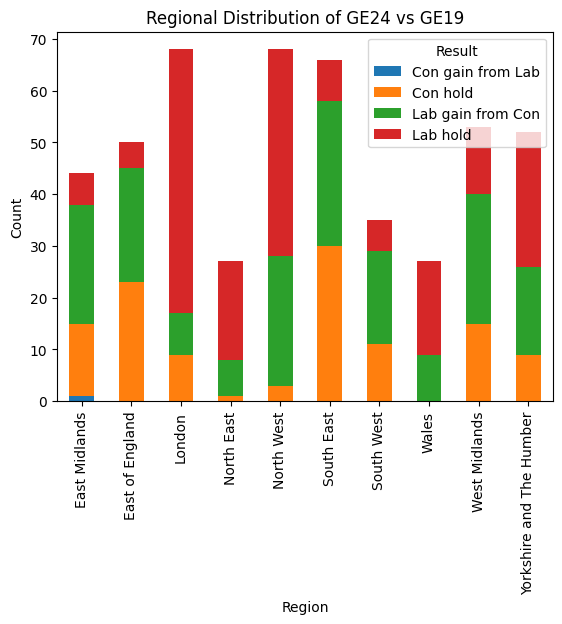

In [ ]:
GEdf = pd.read_csv('/content/ge24vs19.csv')

result_counts =GEdf.groupby(['Region ', 'Result'])['Result'].count().unstack()

# stacked bar chart
result_counts.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Count')
_ = plt.title('Regional Distribution of GE24 vs GE19')

Since 2019 GE,
* Labour stronghholds are in regions of London, NW, NE (gains and holds), where the Tories lost the most seats to Labour in the NW region this time around.
Labour maintained the most seats in London while the Tories held the most in the South East.
* Conservatives seem to mostly hold in East Midlands, East of England, South East, with 1 seat gain from Labout in the EM.
* Wales, WM, and Yorkshire show relatively even distirbution between parties - thus not showing obvious polarisation changes within the 5 years.
---
Relating back to literature,
* What does this mean for Red Wall areas?
Labour seems to be regaining ground in these areas since 2019, particularly in NW and Yorkshire. However, in the Midlands this is not so stark.
* WHat does this mean in terms of the left-behindedness concept?
Labour gaining from Con in left-behind regions suggest these areas may now swing back to Labour since the Tory wins in GE19.

## Merge all datasets

In [ ]:
merged_df = ge24

#Merge with se_education on both ConstCode and Const
merged_df = merged_df.merge(se_education, on=['ConstCode', 'Const'], how='outer')

# Merge with se_income
merged_df = merged_df.merge(se_income, on=['ConstCode', 'Const'], how='outer')

# Merge with se_NSSEC
merged_df = merged_df.merge(se_NSSEC, on=['ConstCode', 'Const'], how='outer')

# Merge with mig
merged_df = merged_df.merge(mig, on=['ConstCode', 'Const'], how='outer')

# Merge with dem_householdage
merged_df = merged_df.merge(dem_householdage, on=['ConstCode', 'Const'], how='outer')

merged_df.tail()

ConstCode              Const Region              Result First party  \
570  W07000108       Swansea West   Wales           Lab hold         Lab   
571  W07000109            Torfaen   Wales           Lab hold         Lab   
572  W07000110  Vale of Glamorgan   Wales  Lab gain from Con         Lab   
573  W07000111            Wrexham   Wales  Lab gain from Con         Lab   
574  W07000112           Ynys Môn   Wales   PC gain from Con          PC   

    Second party  Lab-Con24P  Valid_votersP  ConP  LabP  ...  othermixed16-49  \
570          RUK        31.5          48.03   9.9  41.4  ...             3223   
571          RUK        26.4          49.77  16.1  42.5  ...             3410   
572          Con         9.2          61.54  29.5  38.7  ...             4054   
573          Con        14.7          57.45  24.5  39.2  ...             2135   
574          Con        -7.1          61.40  30.5  23.4  ...                0   

     othermixed16-49p  othermixed50-99  othermixed50-99p  singlefam0-15  \
570               3.4             2318               2.5          16200   
571               3.7             2598               2.8          15963   
572               4.4             2426               2.6          16277   
573               2.2             2015               2.2          16771   
574               0.0                0               0.0          10950   

     singlefam0-15p  singlefam16-49  singlefam16-49p  singlefam50-99  \
570            17.4           30361             32.5           22596   
571            17.3           30513             33.2           26206   
572            17.4           29922             31.9           27164   
573            17.9           31414             33.6           27685   
574            17.3           19429             30.8           22697   

     singlefam50-99p  
570             24.2  
571             28.4  
572             29.0  
573             29.6  
574             35.9  

[5 rows x 78 columns]

Create datasets dividing merged all in percentage and counted values

In [ ]:
# create a list of columns ending with 'p'
percentage_columns = [col for col in merged_df.columns if col.endswith('p')]

# 'ConstCode' and 'Const' as the first columns
percentage_columns = ['ConstCode', 'Const'] + [col for col in percentage_columns if col not in ['ConstCode', 'Const']]

# create a new df with only percentage values, ensuring 'ConstCode' and 'Const' are first
merged_dfP = merged_df[percentage_columns].copy()

In [ ]:
# list of columns that do NOT end with 'p'
counted_columns = [col for col in merged_df.columns if not col.endswith('p')]

# ensure 'ConstCode' and 'Const' are the first columns
counted_columns = ['ConstCode', 'Const'] + [col for col in counted_columns if col not in ['ConstCode', 'Const']]

# ereate a new df with only counted values, ensuring 'ConstCode' and 'Const' are first
merged_df1 = merged_df[counted_columns].copy()

In [ ]:
merged_df1.head()

ConstCode                     Const        Region              Result  \
0  E14001063                 Aldershot     South East  Lab gain from Con   
1  E14001064       Aldridge-Brownhills  West Midlands           Con hold   
2  E14001065  Altrincham and Sale West     North West  Lab gain from Con   
3  E14001066              Amber Valley  East Midlands  Lab gain from Con   
4  E14001067   Arundel and South Downs     South East           Con hold   

  First party Second party  Lab-Con24P  Valid_votersP  ConP  LabP  ...  \
0         Lab          Con        11.7          61.80  29.0  40.7  ...   
1         Con          Lab       -10.5          58.22  38.9  28.4  ...   
2         Lab          Con         8.1          69.51  32.3  40.4  ...   
3         Lab          RUK        11.8          59.45  25.2  37.0  ...   
4         Con           LD       -22.3          70.21  40.2  17.9  ...   

   migStu  migUK  nonmig  onep16-49  onep50-99  othermixed16-49  \
0     244  11641  103066       3733       8372             9021   
1     124   5801   86694       2066       9029             3902   
2     273   7749   90917       2634       8642             3563   
3     107   6791   82437       3298       9186             2866   
4     279   8871   86824       1645      10383             3226   

   othermixed50-99  singlefam0-15  singlefam16-49  singlefam50-99  
0             5172          19486           40183           26967  
1             2875          15145           29785           28881  
2             2428          20252           34321           27173  
3             1985          14391           29070           27843  
4             3094          14183           25653           36363  

[5 rows x 47 columns]

In [ ]:
merged_dfP.head()

ConstCode                     Const  level1_qualp  level2_qualp  \
0  E14001063                 Aldershot          12.6          15.3   
1  E14001064       Aldridge-Brownhills          11.3          15.2   
2  E14001065  Altrincham and Sale West           7.5          12.8   
3  E14001066              Amber Valley          12.2          15.9   
4  E14001067   Arundel and South Downs           9.5          15.8   

   level3_qualp  level4_qualp  no_qualp  other_qualp  dep0p  dep1p  ...  \
0          18.4          31.8      18.7          3.2   51.7   32.8  ...   
1          18.3          28.9      23.3          2.9   46.3   34.5  ...   
2          14.8          50.9      12.0          2.1   58.9   29.3  ...   
3          19.8          26.2      23.3          2.5   46.2   34.3  ...   
4          17.8          39.4      14.9          2.6   55.9   32.6  ...   

   migStup  migUKp  nonmigp  onep16-49p  onep50-99p  othermixed16-49p  \
0     0.21    9.91    87.77         3.2         7.3               7.8   
1     0.13    6.20    92.61         2.2         9.7               4.2   
2     0.27    7.68    90.08         2.7         8.6               3.5   
3     0.12    7.52    91.27         3.6        10.3               3.2   
4     0.29    9.13    89.35         1.7        10.9               3.5   

   othermixed50-99p  singlefam0-15p  singlefam16-49p  singlefam50-99p  
0               4.5            16.9             34.9             23.4  
1               3.1            16.3             32.0             31.0  
2               2.4            20.2             34.2             27.1  
3               2.2            16.1             32.5             31.1  
4               3.2            14.9             26.9             38.1  

[5 rows x 33 columns]

In [ ]:
merged_full = ge24
merged_full = merged_full.merge(merged_dfP, on=['ConstCode', 'Const'], how='outer')
merged_full.tail()

ConstCode              Const Region              Result First party  \
570  W07000108       Swansea West   Wales           Lab hold         Lab   
571  W07000109            Torfaen   Wales           Lab hold         Lab   
572  W07000110  Vale of Glamorgan   Wales  Lab gain from Con         Lab   
573  W07000111            Wrexham   Wales  Lab gain from Con         Lab   
574  W07000112           Ynys Môn   Wales   PC gain from Con          PC   

    Second party  Lab-Con24P  Valid_votersP  ConP  LabP  ...  migStup  migUKp  \
570          RUK        31.5          48.03   9.9  41.4  ...     2.87   11.97   
571          RUK        26.4          49.77  16.1  42.5  ...     0.12    6.63   
572          Con         9.2          61.54  29.5  38.7  ...     0.20    8.21   
573          Con        14.7          57.45  24.5  39.2  ...     0.23    7.44   
574          Con        -7.1          61.40  30.5  23.4  ...     0.24    7.56   

     nonmigp  onep16-49p  onep50-99p  othermixed16-49p  othermixed50-99p  \
570    83.11         6.5        12.1               3.4               2.5   
571    92.09         3.3        10.0               3.7               2.8   
572    90.12         3.3        10.0               4.4               2.6   
573    90.97         3.8        10.0               2.2               2.2   
574    91.15         3.3        12.9               0.0               0.0   

     singlefam0-15p  singlefam16-49p  singlefam50-99p  
570            17.4             32.5             24.2  
571            17.3             33.2             28.4  
572            17.4             31.9             29.0  
573            17.9             33.6             29.6  
574            17.3             30.8             35.9  

[5 rows x 43 columns]

## Summary Statistics

In [ ]:
pd.set_option('display.precision', 1)
merged_full.describe()

Lab-Con24P  Valid_votersP   ConP   LabP  LibDemP  OtherP  level1_qualp  \
count       575.0          575.0  575.0  575.0    575.0   575.0         575.0   
mean         10.8           59.8   24.7   35.5     12.0    27.4          10.2   
std          21.3            7.0   10.1   13.9     13.1    12.2           2.0   
min         -37.6           40.0    0.0    0.0      0.0     6.3           3.0   
25%          -5.9           54.7   16.3   27.9      4.3    21.4           9.1   
50%          10.7           60.5   26.8   38.4      6.8    25.9          10.5   
75%          26.6           65.5   32.6   45.2     11.9    30.4          11.7   
max          67.1           75.2   53.3   70.6     62.7   174.3          14.6   

       level2_qualp  level3_qualp  level4_qualp  ...  migStup  migUKp  \
count         575.0         575.0         575.0  ...  5.8e+02   575.0   
mean           14.3          18.0          35.4  ...  5.7e-01     9.3   
std             2.5           2.9           9.0  ...  1.1e+00     2.8   
min             6.2          10.4          19.5  ...  7.0e-02     5.7   
25%            13.3          16.8          28.8  ...  1.6e-01     7.6   
50%            15.1          18.1          34.0  ...  2.2e-01     8.7   
75%            16.0          19.1          40.0  ...  3.5e-01     9.8   
max            18.6          36.6          66.4  ...  9.5e+00    28.7   

       nonmigp  onep16-49p  onep50-99p  othermixed16-49p  othermixed50-99p  \
count    575.0       575.0       575.0             575.0             575.0   
mean      88.2         3.7         9.1               7.0               3.2   
std        4.3         1.6         1.7               5.0               1.0   
min       56.9         1.5         3.3               0.0               0.0   
25%       87.9         2.7         8.1               3.7               2.5   
50%       89.6         3.3         9.2               5.1               3.0   
75%       90.7         4.2        10.3               8.5               3.5   
max       92.8        13.3        14.3              34.0               8.9   

       singlefam0-15p  singlefam16-49p  singlefam50-99p  
count           575.0            575.0            575.0  
mean             16.9             32.0             26.3  
std               2.0              3.0              6.5  
min               9.8             18.0              8.3  
25%              15.7             30.3             22.1  
50%              16.9             32.4             27.1  
75%              18.2             33.8             30.9  
max              22.2             45.1             40.6  

[8 rows x 37 columns]

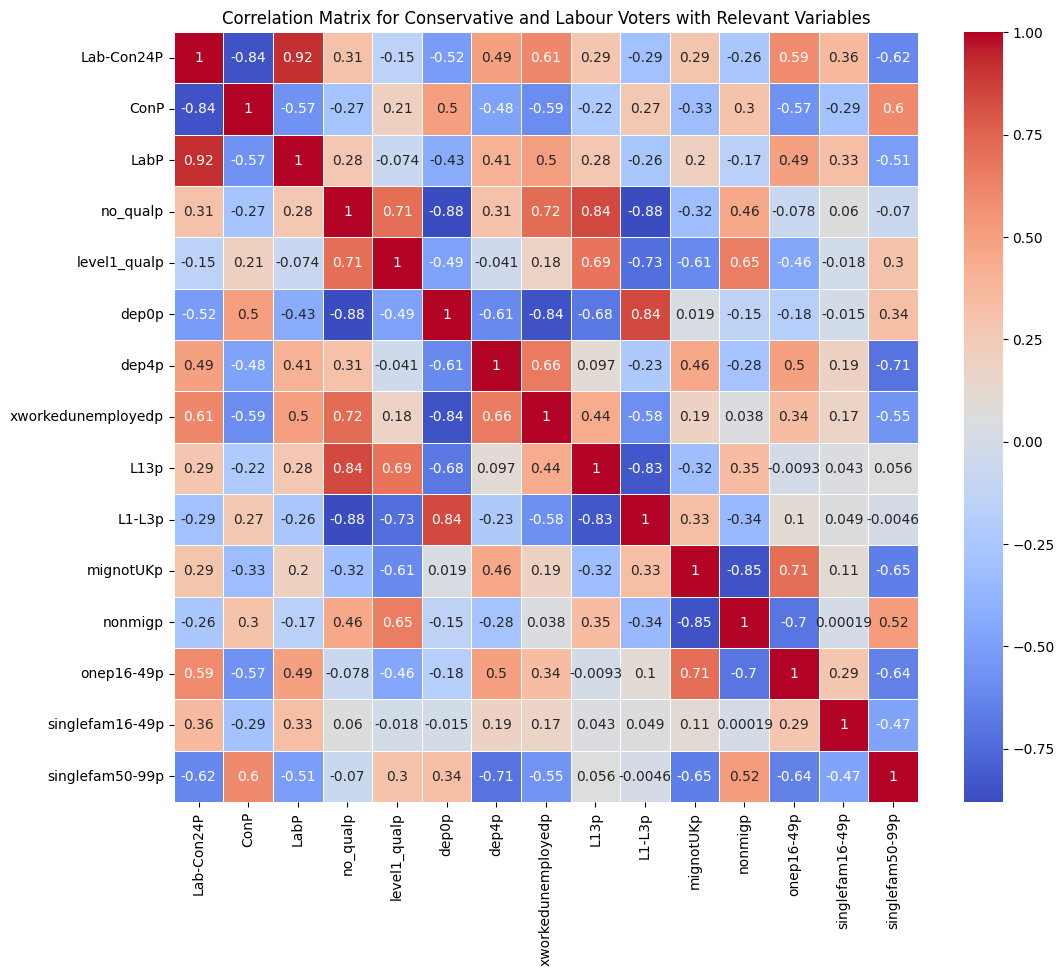

In [ ]:
# select relevant columns based on literature
relevant_columns = [
    'Lab-Con24P', 'ConP', 'LabP',                   # Political variables
    'no_qualp', 'level1_qualp',  # Education
    'dep0p', 'dep4p', # Deprivation levels
    'xworkedunemployedp', 'L13p', 'L1-L3p',  # Socioeconomic
    'mignotUKp', 'nonmigp',              # Migrant status
    'onep16-49p', 'singlefam16-49p', 'singlefam50-99p'  # Household by age
]

# create a subset of the df with the relevant columns
df_relevant = merged_full[relevant_columns]

# correlation matrix
corr_matrix = df_relevant.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Conservative and Labour Voters with Relevant Variables')
plt.show()

In [ ]:
#dummy variables:

#constituencies won by Labour over Conservative
merged_full['LabOverConP'] = (merged_full['Lab-Con24P']>0)*1

#consituencies where highest qualification L4 voters is greater than the average
merged_full['Most_Qualp'] = (merged_full['level1_qualp'] > merged_full['level1_qualp'].mean())*1

#consituencies where NO deprivation voters is greater than average.
merged_full['No_Deprp'] = (merged_full['dep0p'] > merged_full['dep0p'].mean())*1

#consituencies where routine NS-SeC voters is greater than average.
merged_full['routine_SECp'] = (merged_full['L13p'] > merged_full['L13p'].mean())*1

#consituencies where no migrants are greater than average.
merged_full['nonmigrant_p']  = (merged_full['nonmigp'] > merged_full['nonmigp'].mean())*1

#consituencies where single-family households aged 16-49 are greater than average.
merged_full['singlefam_below50p'] = (merged_full['singlefam16-49p'] > merged_full['singlefam16-49p'].mean())*1

##Scatterplots



General dummies:
* x-axis: no qualificatin %, y-axis: labour %, hue: lab-con
* x-axis: no deprivation %, y-axis: labour %, hue: lab-con

RQ1: How do socioeconomic variables predict constituency-level voting patterns in the UK?
* No qualification voters & Labour % (hue no deprivation above average)
* Deprivation all 4 levels & Labour % (hue: single-family household voters below 50y/o)

RQ2: To what extent do migration patterns post-Brexit impact the political landscape in the UK at constituency-level?
* International migrants vs Labour% (where hue is areas of higher than average % of Level 1 qualification )
* Non-Migrant % vs Labour % (Hue: Lab>Con)


RQ3: Can demographic changes (e.g. age distribution and household composition) predict shifts in voting behaviour from migration trends?
* One-person household voters below 50 vs Employment (where Lab>Con)
* Single-family household voters below 50 y/o vs Labour % (where non-migrants are higher than average)

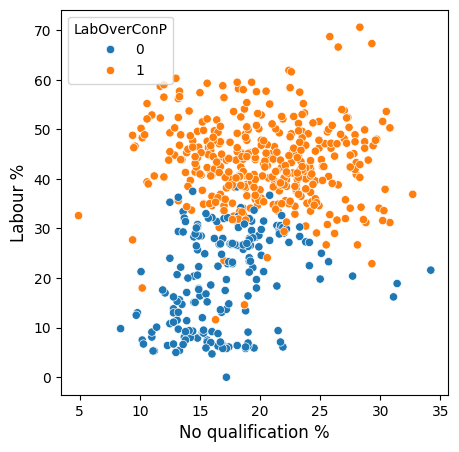

In [ ]:
# Qualification vs Labour % (where Labour > Con)

import seaborn as sb

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

# plot the scatterplot
sb.scatterplot( ax = ax , x = 'no_qualp' , y = 'LabP' , data = merged_full, hue= 'LabOverConP')

# x-axis label
ax.set_xlabel( "No qualification %" , size = 12 )

# y-axis label
ax.set_ylabel( "Labour %" , size = 12 )

plt.show()


* The hue 'LabOverConP' generates a binary outcome where 0 constitutes areas where Conservatives outperform Labour, and 1 is where Labour won over Conservatives.
* In areas where Labour wins [1]: the slightly negative relationship observed suggest that as the percentage of people with no qualification increases, the share of Labour votes slightly decrease.
* However, the outliers in Labour over Conservative dominant constituencies also indicate that, although lower Labour votes, voters tended to also have lower proportions of no qualifications.

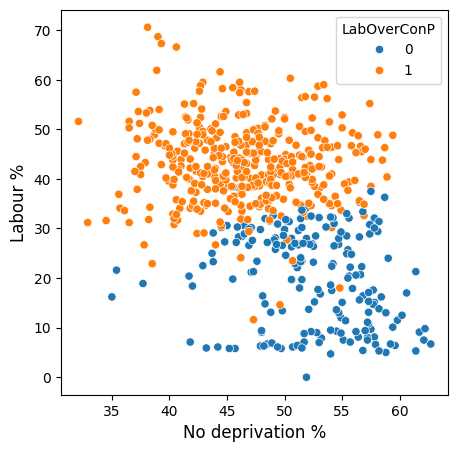

In [ ]:
# Deprivation vs Labour %. (where Labour > Con)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'dep0p' , y = 'LabP' , data = merged_full, hue= 'LabOverConP')

ax.set_xlabel( "No deprivation %" , size = 12 )

ax.set_ylabel( "Labour %" , size = 12 )

plt.show()


* There is a clear negative relationship between voters not deprived and labour, where as areas become less deprived, Labour votes decrease.  
* In Labour won constituencies, the dense clusters of higher Labour vote shares at about 40-50% indicate similar percentages of those also not deprived.
* However, there are a few outliers in areas that are mostly not deprived (above 45%) where Labour has very low vote shares, but still won over Conservatives. SImilarly, there are also Conservative majority areas with low Labour supporters that are more deprived.

### RQ1

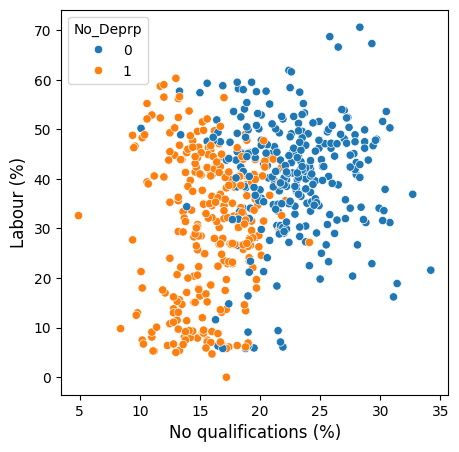

In [ ]:
# No qualification voters & Labour % (hue no deprivation above average)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'no_qualp' , y = 'LabP' , data = merged_full, hue= 'No_Deprp')

ax.set_xlabel( "No qualifications (%)" , size = 12 )

ax.set_ylabel( "Labour (%)" , size = 12 )

plt.show()


^ In constituencies where non-deprived voters are above average [1], there tends to be lower proportions of those with no qualifications (under 20%), but also lower Labour vote shares compared to areas that are more deprived [0].However, Labour votes were still mainly clustered at 30-50% - deprived areas or not.

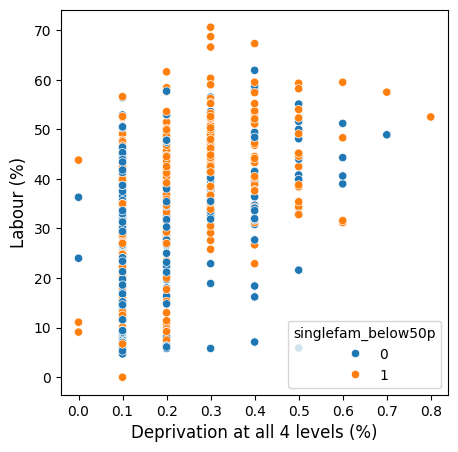

In [ ]:
# for deprivation all 4 & Labour % (hue: single-family household voters below 50)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'dep4p' , y = 'LabP' , data = merged_full, hue= 'singlefam_below50p')

ax.set_xlabel( "Deprivation at all 4 levels (%)" , size = 12 )

ax.set_ylabel( "Labour (%)" , size = 12 )

plt.show()


^ Due to the low variability of the most deprived voters, there is not a clear linear trend observed in the labour vote. However, the existing main cluster show that in areas where single-family housholds under 50 years old are below average [0], there are lesser proportions of the most deprived and also relatively lower Labour votes compared to areas where these demographics are above average.
**Labour performed better in  areas of higher deprivation and single-family household under 50 years old.**

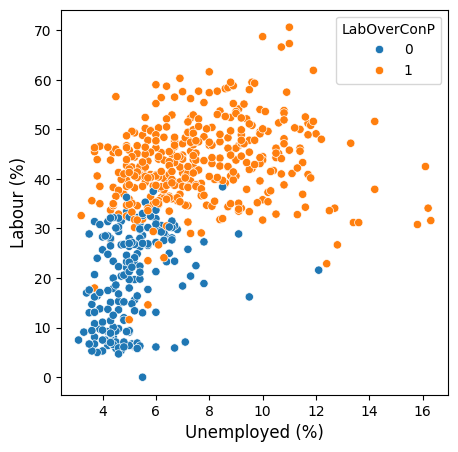

In [ ]:
# for unemployed & Labour % (hue: single-family household voters below 50)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'xworkedunemployedp' , y = 'LabP' , data = merged_full, hue= 'LabOverConP')

ax.set_xlabel( "Unemployed (%)" , size = 12 )

ax.set_ylabel( "Labour (%)" , size = 12 )

plt.show()


^ there is a positive relationship between unemployment and Labour vote shares, where votes increase as unemployment proportions increase in areas where Labour outperform Conservatives [1].
* Proportions of those unemployed across all constituencies were generally on the lower end (below 10%), however where unemployment % were between 5-10%, this is where Labour votes were highest (40-60%) in Labour won areas. Conservatives did much better in low unemployment areas.
*  much clearer relationship also highlights employment levels being a key factor in determining Labour's success.

### RQ2:






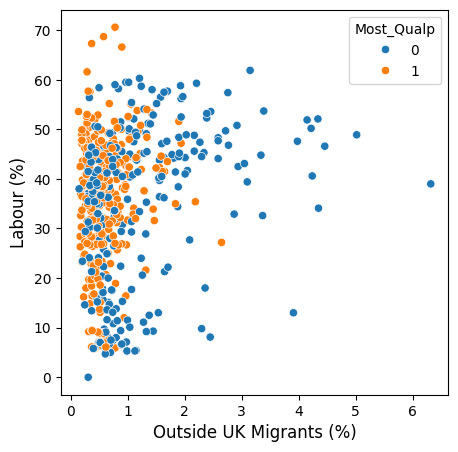

In [ ]:
# International migrants vs Labour% (where hue is areas of higher than average % of Level 1 qualification )

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'mignotUKp' , y = 'LabP' , data = merged_full, hue= 'Most_Qualp')

ax.set_xlabel( "Outside UK Migrants (%)" , size = 12 )

ax.set_ylabel( "Labour (%)" , size = 12 )

plt.show()


^ There were generally very low proportions of migrants from outside the UK across constituences, but  there is a slight positive relationship between the amount of non-uk migrants and Labour support.
* In areas where those with highest qualifications were above average [1], there were denser clusters in higher Labour votes compared to in areas where most qualified voters were below average [0].
* However, there are also many outliers in less educated areas with higher non-UK migrants that consists of higher Labour vote shares.
* Many outliers present implies how despite being important predictors and higher migration rates correlating with labour support, there are other important factors that may be contributors to voting behaviour. There are also specific areas where this dynamic does not hold as low migration areas also show strong Labour support.


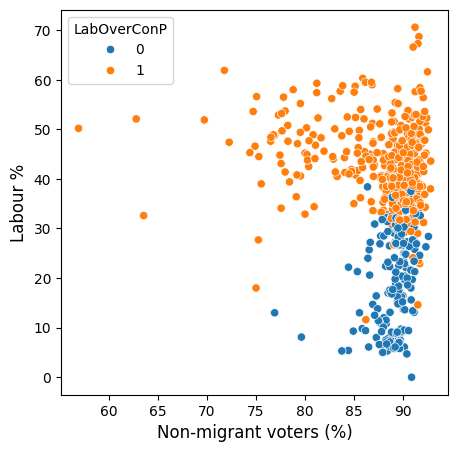

In [ ]:
# x-axis: Non-Migrant %, y-axis: Labour % (Hue: Lab>Con)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'nonmigp' , y = 'LabP' , data = merged_full, hue= 'LabOverConP')

ax.set_xlabel( "Non-migrant voters (%)" , size = 12 )

ax.set_ylabel( "Labour %" , size = 12 )

plt.show()

* For obvious reasons, voters who were non-migrants made up the most demographics (above 75%). Nevertheless, in areas where Labour won over Conservative, strong clusters at about 40-50% Labour proportions were also areas with majority non-migrants.
* Labour won areas were however more diverse, where there are also outliers that lie in lower non-migrant voters (where 30-40% were either migrants within the UK or from outside).
* Constituencies of Conservative strongholds tended to have clearer trends of being non-migrant voters than Labour won areas.

### RQ3

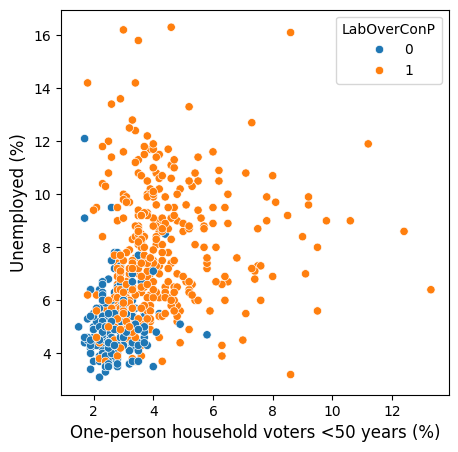

In [ ]:
# One-person households <50 vs Employment (where Lab>Con)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'onep16-49p' , y = 'xworkedunemployedp' , data = merged_full, hue= 'LabOverConP')

ax.set_xlabel( "One-person household voters <50 years (%)" , size = 12 )

ax.set_ylabel( "Unemployed (%)" , size = 12 )

plt.show()

^ As one-person household voters who were under 50 years old increase, unemployed increase.
* This trend is more obvious yet spread out in constituencies where Labour won over the Tories. Labour performed better in areas with higher unemployment and higher proportions of younger and one-person household demographics.
* Where Conservatives dominated, there were lower unemployment rates and one-person household younger voters,

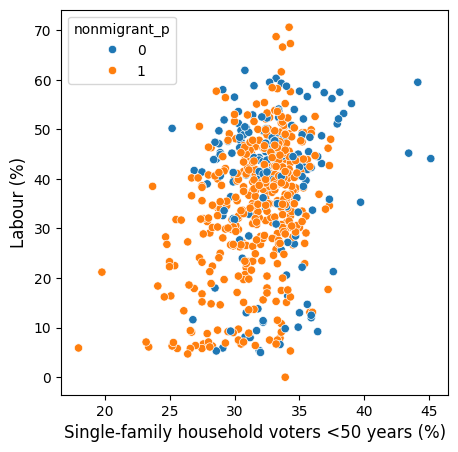

In [ ]:
# Single-family household voters <50 y/o vs Labour (where non-migrants are higher than average)

fig, ax = plt.subplots(figsize = ( 5 , 5 ))

sb.scatterplot( ax = ax , x = 'singlefam16-49p' , y = 'LabP' , data = merged_full, hue= 'nonmigrant_p')

ax.set_xlabel( "Single-family household voters <50 years (%)" , size = 12 )

ax.set_ylabel( "Labour (%)" , size = 12 )

plt.show()


^ There is no clear trend observed between the proportions of younger, single family households and Labour.Generally though, areas where non-migrant populations are above average had a spread out dynamic of Labour support, but with slightly denser clusters between 35-60%.
* outliers suggest that migration status is not always a perfect predictor of Labour support. In some more homogeneous areas (high non-migrant population), Labour still manages to perform well, while in more diverse areas, Labour's support may fall.


### Distribution Plots

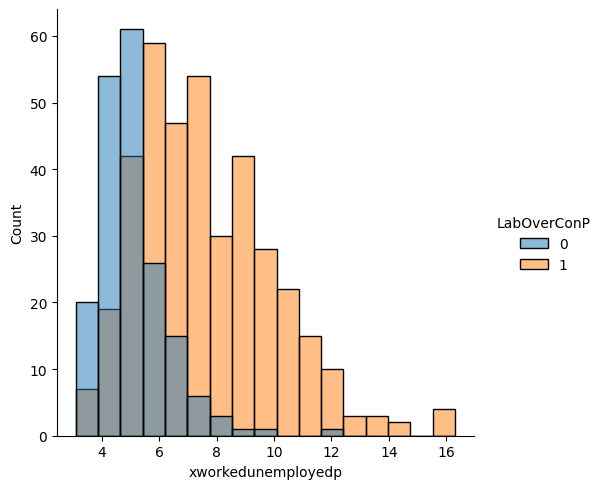

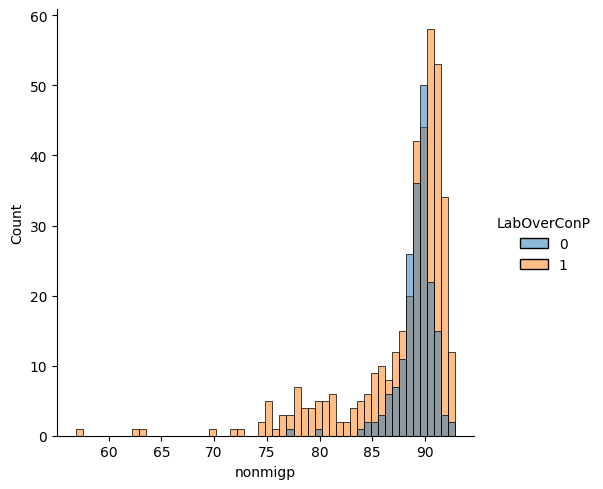

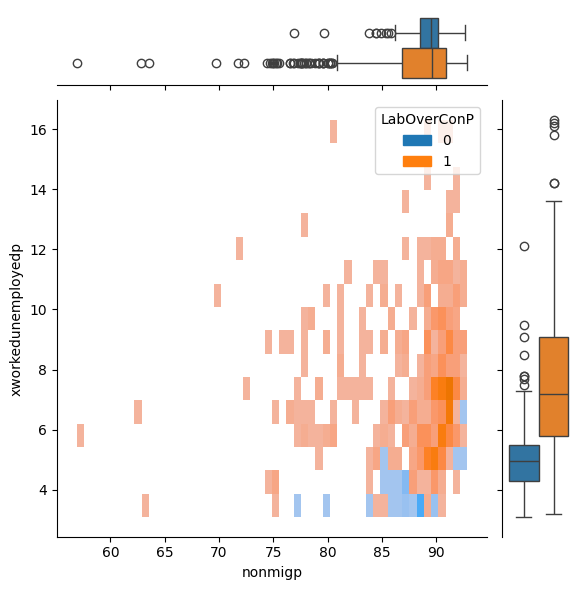

In [ ]:
sb.displot(merged_full, x='xworkedunemployedp',hue='LabOverConP')
sb.displot(merged_full, x='nonmigp',hue='LabOverConP')
g = sb.JointGrid(data=merged_full, x="nonmigp", y="xworkedunemployedp", hue='LabOverConP')
g.plot_joint(sb.histplot)
g.plot_marginals(sb.boxplot)

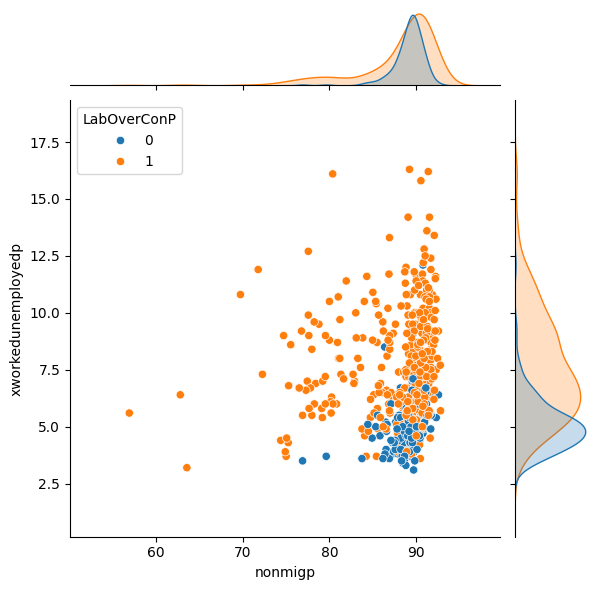

In [ ]:
sb.jointplot(data=merged_full, x="nonmigp", y="xworkedunemployedp", hue='LabOverConP')

1. In this histogram, the orange bar indicates areas where Labour won over Conservatives, while the blue bar represents constituencies where Conservatives had better results. It further demonstrates on how Labour performed better in areas constituting voters who has not worked or unemployed, aliginng with the trends observed prior to this,
2. In the histogram on non-migrant proportions and voting choice, Labour dominated areas observed slightly lower percentage of non-migrant voters compared to the contrary. Labour also performed better in more diverse areas with more migrant voters, while Conservative areas were more homogeneous in their votes with higher non-migrants.
3. The hexbin and boxplots between non-migrant voters and those who are unemployed also agrees with scatterplot visalisations suggesting denser proportions in Conservative-dominant areas where unemployment rates are lower, and non-migrant population rates higher.
4. Joint plot of scatterplot with kernel density estimators suggest that in Labour dominated constituencies, there is a slight positive relationship where the higher the local populations, the  higher the proportions of unemployed. Though this is more spread out than the localised Conservative areas. KDE shows Labour constituencies are more common with higher unemployment and more diverse populations.


#Results

## OLS

In [ ]:
# reduced dataset for OLS
reduced_df = [
    'Lab-Con24P',                   # Political variable
    'no_qualp',  # Education
    'dep4p', # Deprivation levels
    'xworkedunemployedp',  # Socioeconomic
    'nonmigp',   # Migrant status
    'singlefam16-49p'  # Household by age
]

# create a subset of the df with the relevant columns
df_reduced = merged_full[reduced_df]

In [ ]:
#summ stats of reduced dataset
df_reduced.describe()

Lab-Con24P  no_qualp  dep4p  xworkedunemployedp  nonmigp  \
count       575.0     575.0  575.0               575.0    575.0   
mean         10.8      19.2    0.2                 6.8     88.2   
std          21.3       4.9    0.1                 2.4      4.3   
min         -37.6       4.9    0.0                 3.1     56.9   
25%          -5.9      15.6    0.1                 5.0     87.9   
50%          10.7      18.8    0.2                 6.2     89.6   
75%          26.6      22.6    0.3                 8.3     90.7   
max          67.1      34.2    0.8                16.3     92.8   

       singlefam16-49p  
count            575.0  
mean              32.0  
std                3.0  
min               18.0  
25%               30.3  
50%               32.4  
75%               33.8  
max               45.1

dep4p has relatively very low variations, making it not the most ideal variable for analysis. However, dep0p on the contrary is very highly correlated with more variables (>0.7), therefore, we stick to the use of dep4p and address the low variation issue by normalising variables.

                    Lab-Con24P  no_qualp  dep4p  xworkedunemployedp  nonmigp  \
Lab-Con24P                 1.0   3.1e-01    0.5             6.1e-01 -2.6e-01   
no_qualp                   0.3   1.0e+00    0.3             7.2e-01  4.6e-01   
dep4p                      0.5   3.1e-01    1.0             6.6e-01 -2.8e-01   
xworkedunemployedp         0.6   7.2e-01    0.7             1.0e+00  3.8e-02   
nonmigp                   -0.3   4.6e-01   -0.3             3.8e-02  1.0e+00   
singlefam16-49p            0.4   6.0e-02    0.2             1.7e-01  1.9e-04   

                    singlefam16-49p  
Lab-Con24P                  3.6e-01  
no_qualp                    6.0e-02  
dep4p                       1.9e-01  
xworkedunemployedp          1.7e-01  
nonmigp                     1.9e-04  
singlefam16-49p             1.0e+00  


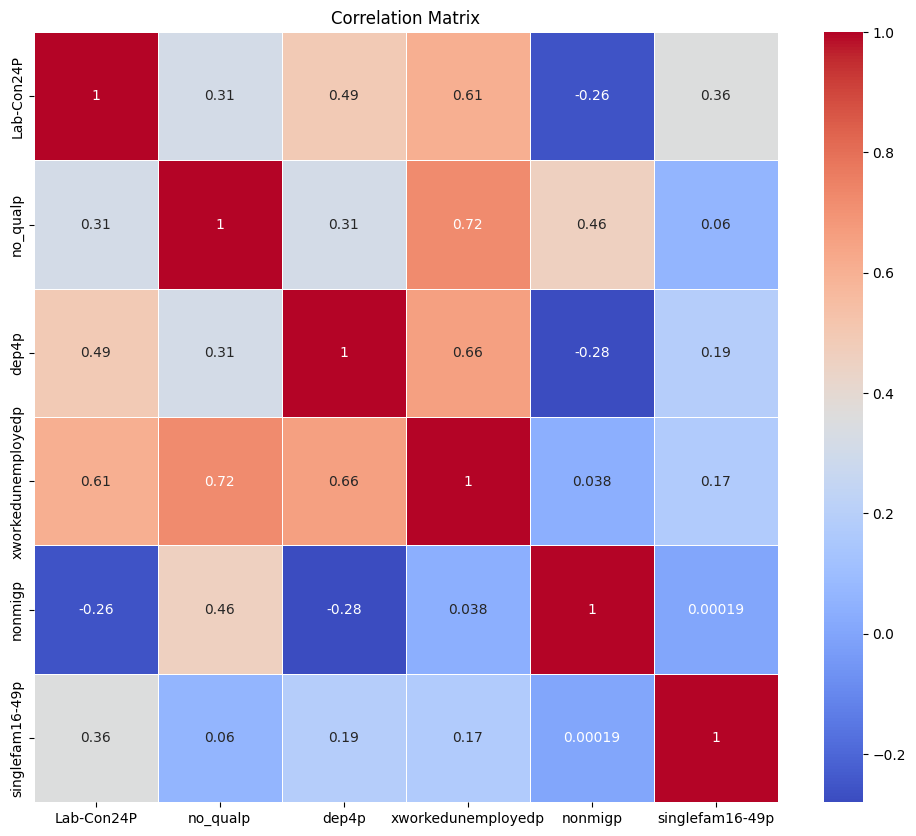

In [ ]:
# correlation matrix
corr_matrix = df_reduced.corr()
print(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# just for filtering strong correlations purposes
threshold = 0.7
reduced_strong_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]
print(reduced_strong_corr)

                    Lab-Con24P  no_qualp  dep4p  xworkedunemployedp  nonmigp  \
Lab-Con24P                 1.0       NaN    NaN                 NaN      NaN   
no_qualp                   NaN       1.0    NaN                 0.7      NaN   
dep4p                      NaN       NaN    1.0                 NaN      NaN   
xworkedunemployedp         NaN       0.7    NaN                 1.0      NaN   
nonmigp                    NaN       NaN    NaN                 NaN      1.0   
singlefam16-49p            NaN       NaN    NaN                 NaN      NaN   

                    singlefam16-49p  
Lab-Con24P                      NaN  
no_qualp                        NaN  
dep4p                           NaN  
xworkedunemployedp              NaN  
nonmigp                         NaN  
singlefam16-49p                 1.0  


We avoid the use of variables with very high correlations above 0.7 as this may suggest redundancy.

In [ ]:
#separate the outcome variable
cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

#create df of explanatory variables
adf = pd.DataFrame(df_reduced[['no_qualp','dep4p','xworkedunemployedp','nonmigp','singlefam16-49p']])

#add constant to regression
xdf = sm.add_constant(adf)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

normalised_adf = pd.DataFrame(scaler.fit_transform(adf), columns=adf.columns)

In [ ]:
results = sm.OLS(cdf,xdf).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Lab-Con24P   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     118.8
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           6.49e-86
Time:                        17:02:29   Log-Likelihood:                -2368.5
No. Observations:                 575   AIC:                             4749.
Df Residuals:                     569   BIC:                             4775.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 43.9721     16

^ all variables are statistically significant predictors EXCEPT no_qualp and dep4p.
However, when tested by exchanging the employment level variable of "unemployed %" to "routine worker %", dep4p seems to have the largest positive effect. We do not remove insignificant variables here to see how TDABM can capture relationships where OLS cannot.
* The R-squared suggests that 51.1% of the variation in Labour vs. Conservative vote share can be explained by the variables. This is moderately good.
* 	high condition number indicates potential multicollinearity, which should be further checked -> may need to drop or combine highly correlated variables to improve the model's stability.
* Residuals appear to be normally distributed - no evidence of significant autocorrelation


In [ ]:
df_reduced['predictions'] = results.fittedvalues
df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']

<ipython-input-49-e4be8d764327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['predictions'] = results.fittedvalues
<ipython-input-49-e4be8d764327>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']


 ### *Assumption checks*

In [ ]:
#check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(xdf,i) for i in range(xdf.shape[1])],index=xdf.columns)

const                 717.6
no_qualp                3.4
dep4p                   2.1
xworkedunemployedp      3.9
nonmigp                 1.8
singlefam16-49p         1.1
dtype: float64

^ VIF results show that multicollinearity is not a serious issue in the model, except for the constant term being above 10  (which is typical).

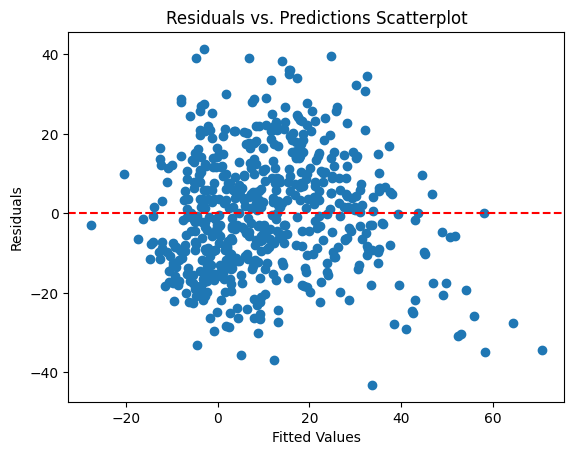

In [ ]:
residuals = df_reduced.residuals
predictions = df_reduced.predictions

plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions Scatterplot')
plt.show()

^ In terms of homoscedasticity- plots are somewhat scattered, with very mild heteroscedasticity around fitted values near 40. This potential non-linearity highlights the need to use a non-linear mdodel to visualise relationships. We continue conducting a homo+heteroscedasticity test for further diagnostics.

In [ ]:
# Homoescedasticity - Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(results.resid, results.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 36.91358469989023, 'LM-Test p-value': 6.233196124383069e-07, 'F-Statistic': 7.806861164678521, 'F-Test p-value': 4.0395776197428345e-07}


In [ ]:
# Heteroscedasticity - Goldfeld-Quandt test

from statsmodels.stats.diagnostic import het_goldfeldquandt
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f'Goldfeld-Quandt test: {gq_test}')

Goldfeld-Quandt test: (0.9330542975266694, 0.7192553482898352, 'increasing')


^
* for Breusch-Pagan test, p-value < 0.05 implies that we reject the null hypothesis - meaning **there is heteroscedasticity**.
* for Goldfeld-Quandt test, test stat close to 1 (0.933) suggests variances in both are similar.
* P-value > 0.05 implies that we do not reject the null hypothesis, therefore **no significant evidence of heteroscedasticity**.
* *Both tests suggest different assumptions, though the slight deviations in q-q plot tails below explain thtis heterogeneity.*

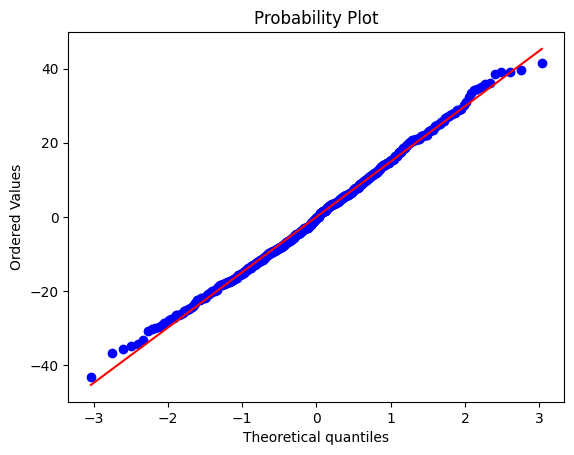

In [ ]:
# q-q plot

import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

In [ ]:
## Shapiro-Wilk
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test: p-value = {p_value}')

Shapiro-Wilk Test: p-value = 0.26837451150729386


^
*   q-q plot generally suggest normal distribution as the points mostly fall within the line, with a little deviation on both tails.
*   Shapiro-Wilk test shows p > 0.05, thus we do not reject the null hypothesis- normality is not violated.



In [ ]:
# Correct for heteroscedasticity using robust standard errors
robust_model = sm.OLS(cdf,xdf).fit(cov_type='HC3')  # HC3 is one common method for robust standard errors
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:             Lab-Con24P   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 13 Sep 2024   Prob (F-statistic):           3.67e-76
Time:                        17:02:31   Log-Likelihood:                -2368.5
No. Observations:                 575   AIC:                             4749.
Df Residuals:                     569   BIC:                             4775.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 43.9721     15

^
* this model corrects heteroscedasticity for more reliable stat. inferences.
* this model adjusts the Standard Errors to reflect true variability without affecting goodness of fit.

In [ ]:
df_reduced['predictions'] = robust_model.fittedvalues
df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']

<ipython-input-57-639ee118a525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['predictions'] = robust_model.fittedvalues
<ipython-input-57-639ee118a525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']


***Discussion*** (to review!)
* The robust OLS model confirms that **Labour tends to perform better in constituencies with younger, economically vulnerable populations** ( single-family households and those who have experienced unemployment). This aligns with literature that identifies Labour’s support base as younger, urban, and more socioeconomically insecure.
* The finding that **higher non-migrant populations correlate with Conservative vote** supports the narrative from recent elections (GE19 + Brexit) that migration have become strong dividing lines in electorares, with the Conservatives appealing more to culturally conservative voters.
* The **lack of significance for the deprivation variables suggests that economic hardship (dep0) alone does not fully explain voting patterns between Labour and Conservative constituencies**. This fits with research showing that, while economic prosperity (or a lack thereof) are important, other SE variables become more prominent in driving voting behavior, especially post-Brexit.

##BallMapper

In [ ]:
import networkx as nx
hsvp = cm.get_cmap("gist_rainbow")

* Since TDABM does not worry about correlation, we include other axis variables from the dataframe we created in Summary Statistics [36] - selected based on literature.
* Balls or nodes represent clusters of constituencies with consideration of other axis socioeconomic, demographic and migration variables. Its sizes indicate the data points that lie witin each ball, where larger balls suggest more points and smaller balls indicate the opposite or potential outliers
* Ball colours represent the range of values of the axis variables
* Edges indicate the overlap or relatonships between constituencies.
* The role of seed: to initialise the randomness of TDABM plots/position. For reproducibility when comparing.
* The role of radius eps: determines the distance of balls from each other, thus controlling the granularity and structure of TDABM outcomes.

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

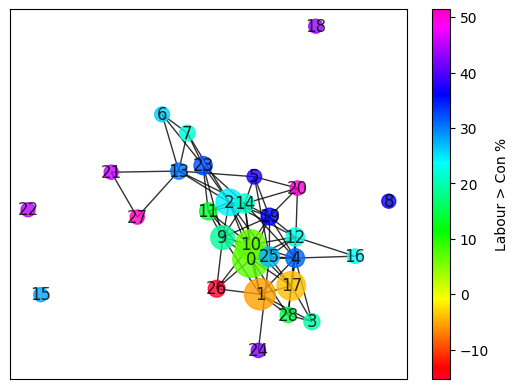

In [ ]:
cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

^
Considering axis variables of having no qualification, deprivation at all 4 levels, unemployment, non-migrant populations who are in single-family households under 50 years old:
* **Main cluster**: the main interconnected nodes is observed among balls 0, 1, 10, 25 which show a mix of colour scale - implying that sharing the same characteristics are likely swing areas where both Labour and Conservative parties compete. They may share similar characteristics but differ in voting behaviour.
* Ball 0 membership (biggest) is shared across more than half of constituencies in England and Wales, with more or less similar vote shares for both Labour and Conservative, but slightly more Labour-leaning.
* **Labour strongholds**: Labour seems to perform best in isolated outlier balls (8 Bham Ladywood, 18 Leeds Central, 22 Sheffield Central) suggesting that these constituencies may have a unique mix of characteristics in smaller constituencies.
* **Conservative strongholds**: The pattern of Tory constituencies are more homogenous than Labour, with denser interconnected nodes and bigger sized balls (these are only balls 26, 1, 17). aligned with findings on Otway paper on GE19
* Ball 15 (Bristol Central)'s isolation is potentially due to its seat dominated by Green.

### **Model assessment**

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

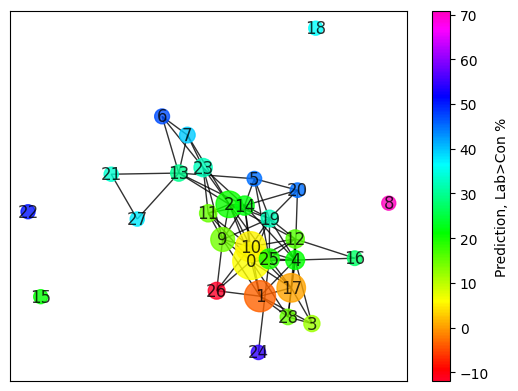

In [ ]:
cdf = pd.DataFrame(df_reduced['predictions'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)


bm1.draw_networkx(coloring_variable='predictions', color_palette=hsvp,
                  colorbar=True, colorbar_label="Prediction, Lab>Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

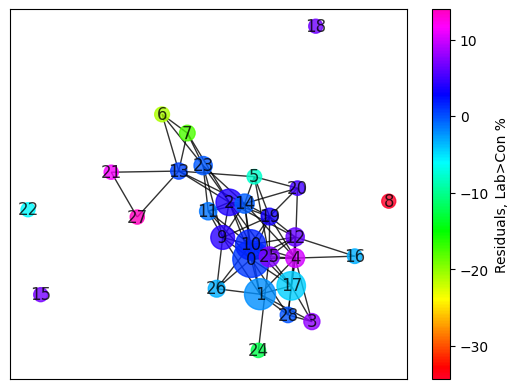

In [ ]:
cdf = pd.DataFrame(df_reduced['residuals'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='residuals', color_palette=hsvp,
                  colorbar=True, colorbar_label="Residuals, Lab>Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

^ *Prediction vs Residuals*
* The former show the model's predicted values while the latter show sthe difference between actual and predicted of the model, with the same axis variables.
* **Prediction**: model seems to be Conservative-biased, with ball clusters ranging from Conservative-dominated to moderate Labour constituencies (green), yet maintaining that outliers areas like balls 18 and 22 are still labour strongholds, and that balls 26, 1, 17 are still Tory strongholds.
* **Residuals**: model reveals the underestimation of Labour wins across many shared characteristic constituencies (blue/purple), specifically in Conservative dominant areas observed in the predicted model (ball 0 and 1). The model was unable to fully capture the actual strong performance by Labour. Ball 8, however, overestimated Labour's strength as Tory support was actually higher than expected in these constituencies.
* **Main takeaway:** Labour's performance was underestimated across many constituencies, especially in Conservative-leaning ones. Although the model suggested Conservative dominance in biggest balls like 0 and 1, Labour seemed to actually perform better in these constituencies.
* Further refinement of model might be needed by including more axis variables to understand the local sociodemographic context of constituencies' voting behaviour.

### **Axis variables**

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

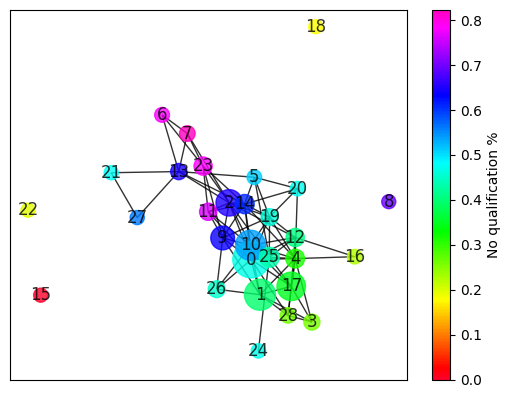

In [ ]:
cdf = pd.DataFrame(normalised_adf['no_qualp'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='no_qualp', color_palette=hsvp,
                  colorbar=True, colorbar_label="No qualification %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* Colour scale is more cool-toned, but the overall pattern observed shows a smooth color transition from cooler to warm down the axis. There is also more homogeneity in clusters as the balls are in similar colour scales (e.g. 6, 7, 23, 11 as constituencies with highest no qual, being Labour constituencies)
* Main cluster: the main interconnected balls with bigger balls (0, 9, 10, 25, 17) observed moderate percentages of no qual as they range towards green-blue tones.
* ***Comparison with scatterplot:*** both reflect the same general trend even with added dimensions -> higher proportions of no qualification, higher Labour support. TDA adds value by highlighting how constituencies with shared educational levels are connected when considering other variables. E.g. in Ball 0 where there is a mix of Labour/Conservative constituencies, there is moderate levels of voters with no qualifications.

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

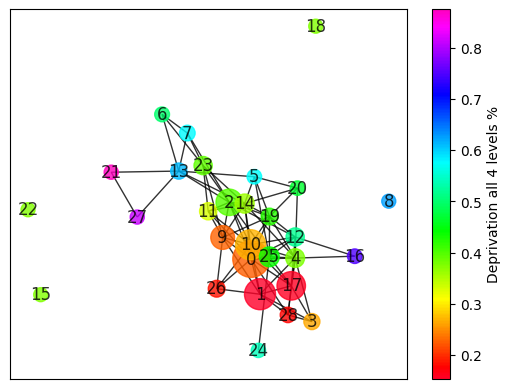

In [ ]:
cdf = pd.DataFrame(normalised_adf['dep4p'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='dep4p', color_palette=hsvp,
                  colorbar=True, colorbar_label="Deprivation all 4 levels %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* Conservative areas observed the lowest of deprivation at all 4 levels (balls 26, 1, 17).
* Labour strongholds area 15, 22, 18 showed moderate levels of deprivation at 4 levels.
* Main clusters: show low deprivation levels where constituencies are either Conservative-leaning or swing areas
* **Comparison with scatterplots:** both agree with each other with added variables, higher deprivation -> higher Labour support. But TDA shows how some areas overlap and are more homogenous within constituency groups in terms of deprivation and political outcvome.

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

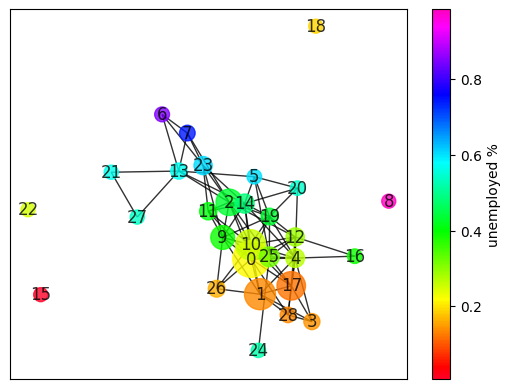

In [ ]:
cdf = pd.DataFrame(normalised_adf['xworkedunemployedp'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='xworkedunemployedp', color_palette=hsvp,
                  colorbar=True, colorbar_label="unemployed %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* For unemployment as colouring variable, these plots are more homogenous, as there is also a smooth transition of colour gradient observed down the axis, with cooler to warmer tones.
* Conservative dominant areas observed lower unemployment rates (orange)
* However, outlier balls 18 (Leeds Central) and balls 22 (Sheffield Central) , although being Labour strongholds, had relatively low unemployment rates. These outliers inidcate that the general trends observed in clusters do not necessarily hold.
* Main cluster: The dense interconnected nodes (0, 10, 25, 1, 17) generally show low to moderate unemployment rates, suggesting that these constituencies with shared characteristics had moderate levels of this.
* **Comparison with scatterplot:** these relationships agree with each other -> Conservative dominant areas had lower unemployment rates than Labour constituencies. However while the scatterplots show linear rships, TDA's smooth colour transitions revealed how high unemployment areas are tightly connected to each other but also surrounded by lower unemployment areas. It also reveals how outliers like Labour stronghold do not hold this typical relationship.

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

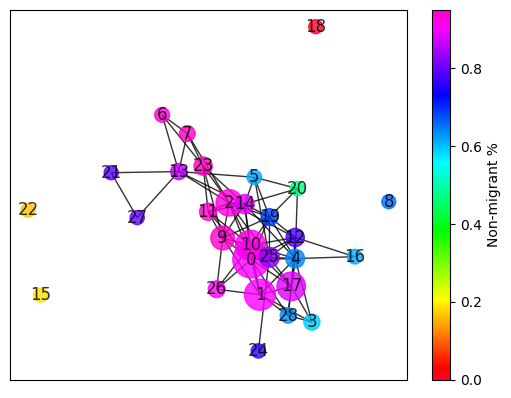

In [ ]:
cdf = pd.DataFrame(normalised_adf['nonmigp'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='nonmigp', color_palette=hsvp,
                  colorbar=True, colorbar_label="Non-migrant %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* Non-migrant populations having a relatively higher scale of is understandably more cool-toned. However,the outliers highlight important contexts.
* Ball 18 (Leeds Central) being a Labour Stronghold had the lowest non-migrant population, therefore highest migrant populations.
* Balls 15 and 22 also observed lower values of non-migrant populations.
* Overall, the homogenous proportions of non-migrant populations indicate similar levels of diversity across constituencies.
* Main cluster: the main clusters lean towards the higher end of non-migrant populations.
* **Comparison with scatterplot:** relationships agree with each other even when considering other variables. Despite non-migrant populations being the dominant demographics, Labour-leaning constituencies observed more diversity than Conservative shared constituencies which appear more homogenous.

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

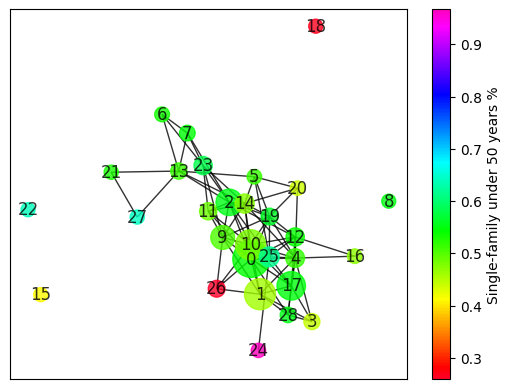

In [ ]:
cdf = pd.DataFrame(normalised_adf['singlefam16-49p'])

bm1=pbm.BallMapper(X=normalised_adf, eps=0.3, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='singlefam16-49p', color_palette=hsvp,
                  colorbar=True, colorbar_label="Single-family under 50 years %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* Demographically, voters consisting single-family households under 50 years old who share other similar characteristics also show moderate homogeneity m(green across axes)
* However, ball 18 once again becomes an outlier with higher proportions of younger voters in single-family households. Ball 24 (East London const.) observes the same trend.These are Labour strongholds.
* The emergence of ball 26 showing relatively higher demographics of single-families under 50 provide another context, these are shared constituencies that are Conservative-leaning.
* Main cluster: moderate levels of single-families under 50.
* **Comparison with scatterplot:** the scatterplot was unable to capture a clear relationship when considering demographics, migrant status, and Labour vote share. However, in TDA with all variables considered, there is a clearer relationship indicating that the higher the younger single-family household voters, the higher the Labour and Conservative vote. However, TDA colouration show how certain balls (like 26, 18, 24) differ from the trend when considering other variables.

Summary of TDABM:
1. Balls moving away from the dense clusters and outliers were mostly Labour strongholds, implying that these constituencies are more heterogeneous in their migration and sociodemographic characteristics.
2. Balls in denser clusters were a mix of weak Labour and Conservative-leaning constituencies, which were bigger with more interconnectivity. These swing areas show more homogeneity in their shared characteristics.
3. Outliers (these consist of only one constituency)
* Ball 18 - Leeds Central
* Ball 22 - Sheffield Central
* Ball 15 - Bristol Central
* Ball 8 -  Birmingham Ladywood
** these areas are all Labour strongholds
4. **Comparison with scatterplot:** Most TDABM plots generally agree with the scatterplots, but provides additional advantage of displaying more distinct and nuanced relationships within shared constituencies where the scatterplots fail to capture. TDA further highllights homogeneity and heterogeneity in clusters where some areas are Labour-leaning, Conservative-leaning, and a mix of both (like Ball 0). Scatterplots are not able to do this.

## Points to balls + results discussion
* this section is to provide information on ball membership to talk about constituencies

In [ ]:
pb1 = bm1.points_and_balls()

In [ ]:
# Create a new dataframe with the normalised independent variables and the dependent variable
normalised_df = pd.concat([normalised_adf, df_reduced['Lab-Con24P']], axis=1)

In [ ]:
merged_full['point'] = merged_full.index
normalised_df['point'] = normalised_df.index

In [ ]:
# Merge the new dataframe with pb1
fulld = merged_full.merge(pb1, on='point')
subd = normalised_df.merge(pb1, on='point')

In [ ]:
# create a reduced dataset with just constituency names and outcomes
ballslist = pd.DataFrame(fulld[["ball","ConstCode","Const","Lab-Con24P"]])
ballslist.to_csv('balllistest2.csv', index=False)

In [ ]:
# Calculate summary statistics for each ball using the normalised data
LabCon24Pm = subd.groupby('ball')['Lab-Con24P'].mean()
no_qualpm = subd.groupby('ball')['no_qualp'].mean()
dep4pm = subd.groupby('ball')['dep4p'].mean()
xworkedunemployedpm = subd.groupby('ball')['xworkedunemployedp'].mean()
nonmigpm = subd.groupby('ball')['nonmigp'].mean()
singlefam1649pm = subd.groupby('ball')['singlefam16-49p'].mean()

ballmeans_normalised = pd.DataFrame([LabCon24Pm,no_qualpm,dep4pm,xworkedunemployedpm,nonmigpm,singlefam1649pm])
ballmeans_normalised = ballmeans_normalised.transpose()

In [ ]:
from IPython.display import display

display(ballmeans_normalised)

Lab-Con24P  no_qualp  dep4p  xworkedunemployedp  nonmigp  \
ball                                                             
0            6.9       0.5    0.2             2.1e-01      0.9   
1           -5.6       0.4    0.2             1.4e-01      0.9   
2           24.4       0.7    0.4             4.3e-01      0.9   
3           19.5       0.3    0.3             1.4e-01      0.6   
4           31.3       0.3    0.4             2.7e-01      0.6   
5           37.3       0.5    0.6             6.0e-01      0.6   
6           26.1       0.8    0.5             8.5e-01      0.9   
7           21.8       0.8    0.6             7.4e-01      1.0   
8           36.4       0.7    0.6             9.8e-01      0.7   
9           18.6       0.6    0.2             3.9e-01      0.9   
10           6.8       0.5    0.3             2.6e-01      0.9   
11          13.8       0.8    0.3             4.1e-01      0.9   
12          22.6       0.4    0.5             2.9e-01      0.8   
13          30.4       0.6    0.6             5.7e-01      0.9   
14          21.2       0.6    0.4             4.8e-01      0.9   
15          28.0       0.0    0.4             7.6e-03      0.2   
16          23.9       0.2    0.8             3.9e-01      0.6   
17          -4.0       0.3    0.2             1.2e-01      0.9   
18          43.1       0.2    0.4             1.9e-01      0.0   
19          36.0       0.5    0.4             4.3e-01      0.7   
20          50.1       0.5    0.5             5.5e-01      0.5   
21          45.2       0.5    0.9             5.7e-01      0.8   
22          44.7       0.2    0.4             2.5e-01      0.2   
23          32.2       0.8    0.4             6.1e-01      0.9   
24          42.0       0.5    0.5             5.2e-01      0.8   
25          27.2       0.4    0.4             3.2e-01      0.8   
26         -15.3       0.5    0.2             1.6e-01      0.9   
27          51.4       0.6    0.8             5.4e-01      0.8   
28          14.8       0.3    0.2             1.4e-01      0.6   

      singlefam16-49p  
ball                   
0                 0.5  
1                 0.5  
2                 0.6  
3                 0.4  
4                 0.5  
5                 0.5  
6                 0.5  
7                 0.5  
8                 0.5  
9                 0.5  
10                0.5  
11                0.5  
12                0.5  
13                0.5  
14                0.5  
15                0.4  
16                0.5  
17                0.5  
18                0.3  
19                0.6  
20                0.4  
21                0.5  
22                0.6  
23                0.6  
24                1.0  
25                0.6  
26                0.3  
27                0.6  
28                0.6

## Mapping constituencies

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
gb_shape = gpd.read_file('/content/PCON_MAY_2024_UK_BGC.shp')

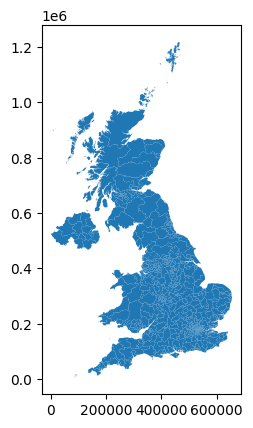

In [ ]:
#check if information is complete -- no gaps
gb_shape.plot(); plt.show()

In [ ]:
constituency_properties = pd.read_csv('/content/constituencyProperties.csv')

In [ ]:
merged_shp = gb_shape.merge(constituency_properties, on='PCON24CD')

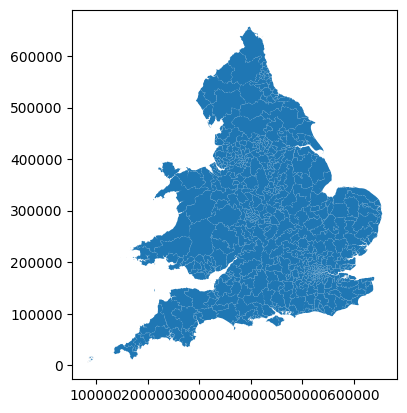

In [ ]:
merged_shp.plot()
plt.show()

In [ ]:
#see names of data
merged_shp.tail()

PCON24CD         PCON24NM_x         PCON24NMW_x     BNG_E     BNG_N  \
570  W07000108       Swansea West  Gorllewin Abertawe  264670.0  195124.0   
571  W07000109            Torfaen             Torfaen  327459.0  200480.0   
572  W07000110  Vale of Glamorgan       Bro Morgannwg  301298.0  173080.0   
573  W07000111            Wrexham             Wrecsam  337298.0  348629.0   
574  W07000112           Ynys Môn            Ynys Môn  245217.0  378331.0   

      LAT  LONG                              GlobalID  \
570  51.6  -4.0  9fedf3a9-9419-487e-b818-15f6ca8f7de0   
571  51.7  -3.1  4f47d450-fbc4-4f28-a6f8-f7e249ebc5db   
572  51.4  -3.4  9351c107-0657-4b3e-818c-a229ae28c66c   
573  53.0  -2.9  8b639a87-871a-4bd8-a17b-ff04ae39e4e2   
574  53.3  -4.3  9317a191-8916-4b96-bae3-86e93c033363   

                                              geometry         PCON24NM_y  \
570  POLYGON ((266468.213 192600.046, 266495.500 19...       Swansea West   
571  POLYGON ((333723.000 192653.903, 333685.380 19...            Torfaen   
572  POLYGON ((302260.803 179531.999, 302291.697 17...  Vale of Glamorgan   
573  POLYGON ((335612.999 359943.297, 335857.102 35...            Wrexham   
574  MULTIPOLYGON (((239052.158 363430.995, 239152....           Ynys Môn   

     ... name3 electorate  countryCD countryNM   regionCD regionNM easting  \
570  ...   SWT      74612  W92000004     Wales  W92000004    Wales  264670   
571  ...   TOR      70591  W92000004     Wales  W92000004    Wales  327459   
572  ...   VOG      70426  W92000004     Wales  W92000004    Wales  301298   
573  ...   WRE      70964  W92000004     Wales  W92000004    Wales  337298   
574  ...   YNM      52415  W92000004     Wales  W92000004    Wales  245217   

     northing  latitude  longitude  
570    195124      51.6       -4.0  
571    200480      51.7       -3.1  
572    173080      51.4       -3.4  
573    348629      53.0       -2.9  
574    378331      53.3       -4.3  

[5 rows x 21 columns]

In [ ]:
#create column to match with df
fulld['PCON24CD'] = fulld['ConstCode']

In [ ]:
# merge data
gb_shape2 = merged_shp.merge(fulld, on='PCON24CD')

In [ ]:
gb_shape2 = gb_shape2.drop_duplicates(subset=None)

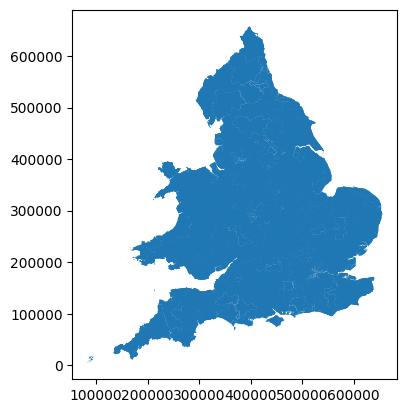

In [ ]:
gb_shape2.plot(); plt.show()

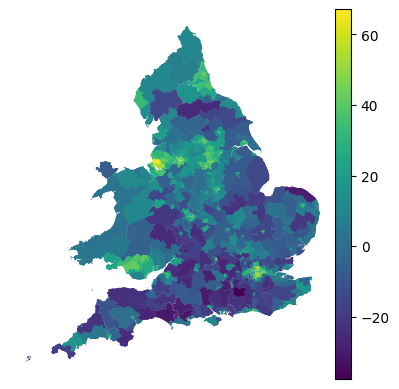

In [ ]:
# now to colour the plots

fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="Lab-Con24P",ax=ax,legend=True,cax=cax)
plt.show()

In [ ]:
# merge points to balls list with the map
fulld2 = gb_shape2.merge(pb1, on='point')

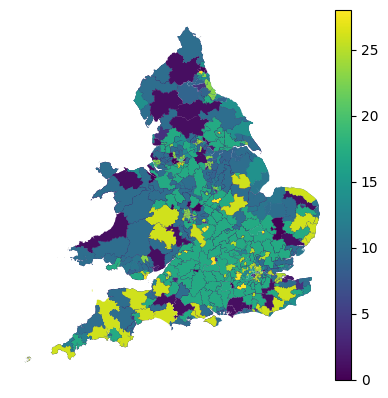

In [ ]:
# map predictions and residuals
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball",ax=ax,legend=True,cax=cax)
plt.show()

In [ ]:
#map for biggest ball 0
gb_shape2['ball0'] = (gb_shape2['ball']==0)*1

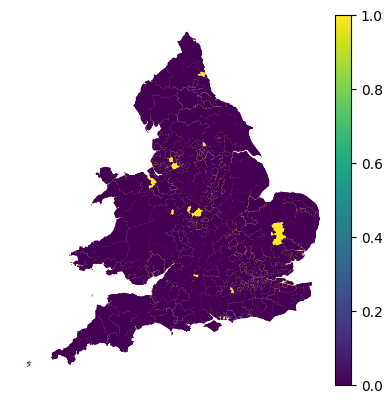

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball0",ax=ax,legend=True,cax=cax)
plt.show()

In [ ]:
#map for Conservative-leaning areas ball 26
gb_shape2['ball26'] = (gb_shape2['ball']==26)*1

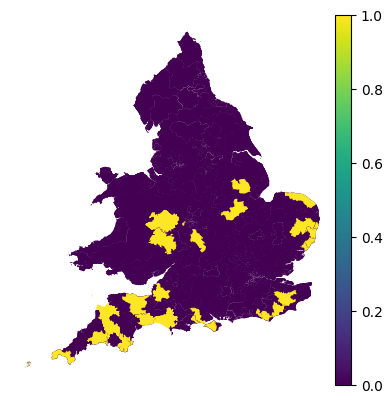

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_axis_off()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right",size="5%", pad=0.0)
gb_shape2.plot(column="ball26",ax=ax,legend=True,cax=cax)
plt.show()

# Robustness checks

## 1. Changing the radius

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

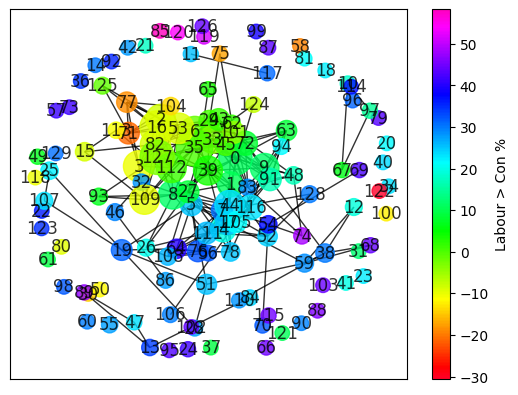

In [ ]:
# radius 0.15

cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adf, eps=0.15, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

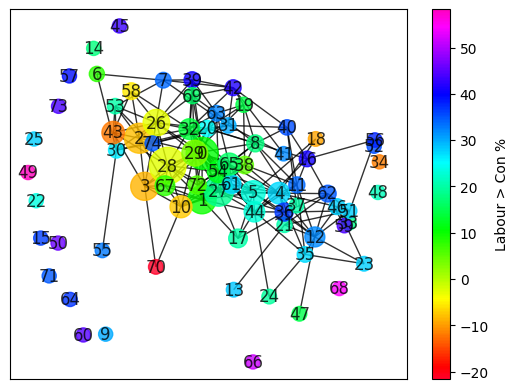

In [ ]:
# radius 0.2

cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adf, eps=0.2, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

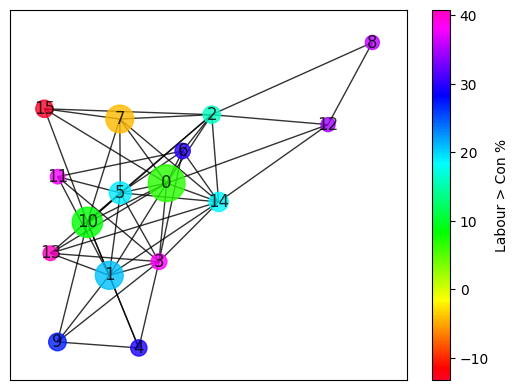

In [ ]:
# radius 0.5

cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adf, eps=0.4, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

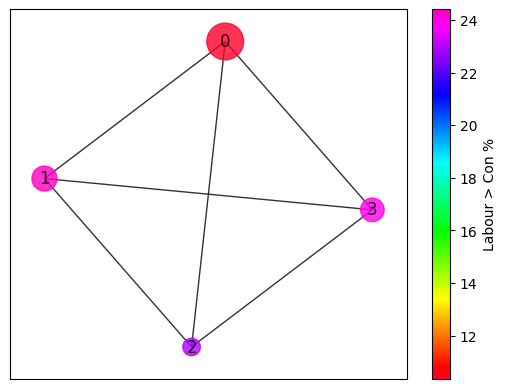

In [ ]:
# radius 0.75

cdf = pd.DataFrame(df_reduced['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adf, eps=0.75, coloring_df=cdf)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* As the radius gets bigger, the balls becomes less detailed and more connected.
* When the radius was smaller than the default (eps = 0.15, 0.2),
** the plots show more fragemented, isolated, and smaller balls. Connectivity is even more limited as the small radii generates local clusters. This implies even smaller areas sharing similar characteristics and therefore greater detail.
** Using smaller radius would be useful if the study chooses to make even greater analysis on the fine details between specific constituencies.
** The colour scale observed in these still preserve the trend observe in our default radius, but with slightly greater detail.
* When the radius was bigger than default (eps = 0.5, 0.75),
** there were significantly fewer balls as they contain more shared constituencies. Although there is stronger connectivity between balls, plot unravels broad inferences, losing the value of finer details potentially observed in smaller areas.
** Using bigger radius is useful for more general pattern observations where details are not a priority.
** The colour scale and general pattern of the balls are completely different, therefore losing our original structure -> different inferences.

## 2. Testing with other expanded variables
based on literature:

In [ ]:
#separate the outcome variable
cdfBM = pd.DataFrame(df_relevant['Lab-Con24P'])

#create df of explanatory variables
adfBM = pd.DataFrame(merged_full[[
    'no_qualp', 'level1_qualp', 'level2_qualp', 'level3_qualp', 'level4_qualp', # Education
    'dep0p', 'dep1p', 'dep2p', 'dep3p', 'dep4p', # Deprivation levels
    'xworkedunemployedp', 'L13p', 'L12p', 'L10-L11p', 'L8-L9p', 'L7p', 'L4-L6p', 'L1-L3p', 'studentp',  # Socioeconomic
    'mignotUKp', 'migUKp', 'migStup', 'nonmigp',              # Migrant status
    'onep16-49p', 'onep50-99p', 'othermixed16-49p', 'othermixed50-99p',	'singlefam0-15p',	'singlefam16-49p', 'singlefam50-99p'  # Household by age
]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#create noramalised adf for expanded variables
normalised_adfBM = pd.DataFrame(scaler.fit_transform(adfBM), columns=adfBM.columns)

In [ ]:
df_reduced['predictions'] = robust_model.fittedvalues
df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']

<ipython-input-97-639ee118a525>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['predictions'] = robust_model.fittedvalues
<ipython-input-97-639ee118a525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['residuals'] = df_reduced['Lab-Con24P']-df_reduced['predictions']


/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

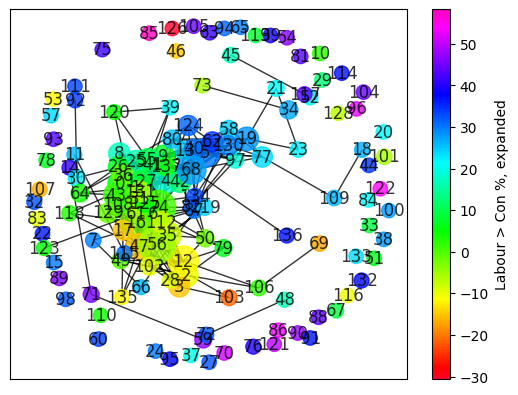

In [ ]:
#Labour>Con

cdfBM = pd.DataFrame(df_relevant['Lab-Con24P'])

bm1 = pbm.BallMapper(X=normalised_adfBM, eps=0.5, coloring_df=cdfBM)

bm1.draw_networkx(coloring_variable='Lab-Con24P', color_palette=hsvp,
                  colorbar=True, colorbar_label="Labour > Con %, expanded",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* By expanding the variables and maintaining the radius (eps = 0.3), significantly more balls are observed, including more clusters and outliers.
* The largest balls like balls 0 and 14 are in the shades of green, maintaining the finding that these shared constituencies are weak Labour win areas.
* There is another cluster of shared constituencies observed in the bottom right of the axes in the cooler scale, indicating strong Labour areas.
* The outliers for expanded variables are a more diverse mix of Labour and Conservative areas as opposed to the limited variables that showed clear Labour constituencies.


/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

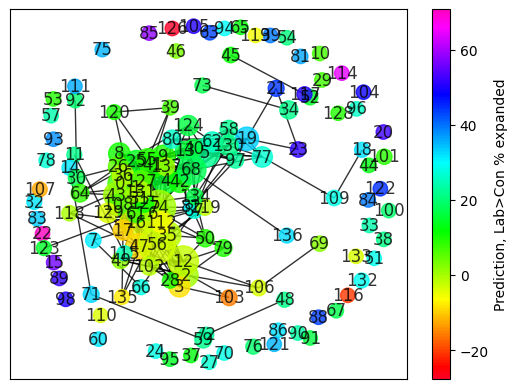

In [ ]:
#predictions

cdfBM = pd.DataFrame(df_reduced['predictions'])

bm1=pbm.BallMapper(X=normalised_adfBM, eps=0.5, coloring_df=cdfBM)

bm1.draw_networkx(coloring_variable='predictions', color_palette=hsvp,
                  colorbar=True, colorbar_label="Prediction, Lab>Con % expanded",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


<Axes: >

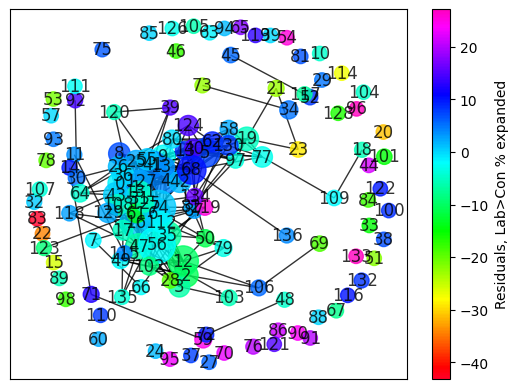

In [ ]:
#residuals

cdfBM = pd.DataFrame(df_reduced['residuals'])

bm1=pbm.BallMapper(X=normalised_adfBM, eps=0.5, coloring_df=cdfBM)

bm1.draw_networkx(coloring_variable='residuals', color_palette=hsvp,
                  colorbar=True, colorbar_label="Residuals, Lab>Con % expanded",
                  pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

* The prediction graph is closer to the actual graph when more variables are considered.
* The residuals graph suggest a slight underestimation of Labour's performance in clustered areas.
* With expanded variables, colours are more uniform within clusters, but more scattered in outlier balls compared to the original axis.

In [ ]:
#INDEPENDENT VARIABLES

Initial axis variables:

* 'no_qualp'
* 'dep4p'
* 'xworkedunemployedp'
* 'nonmigp'
* 'singlefam16-49p'
---
Expanded axis variables:
* 'no_qualp', **'level1_qualp'**
* '**dep0p**', 'dep4p'
* 'xworkedunemployedp', '**L13p**', '**L1-L3p**'
* '**mignotUKp**', 'nonmigp'
* '**onep16-49p**', 'singlefam16-49p', '**singlefam50-99p**'

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


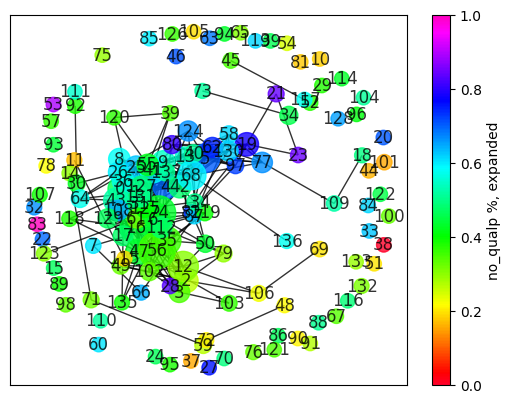

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


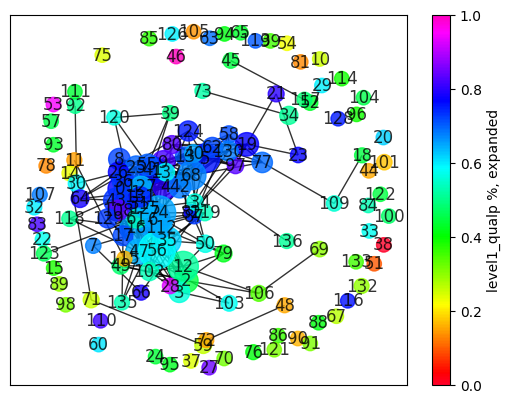

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


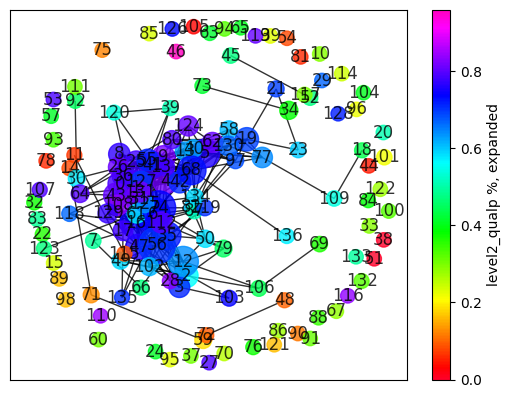

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


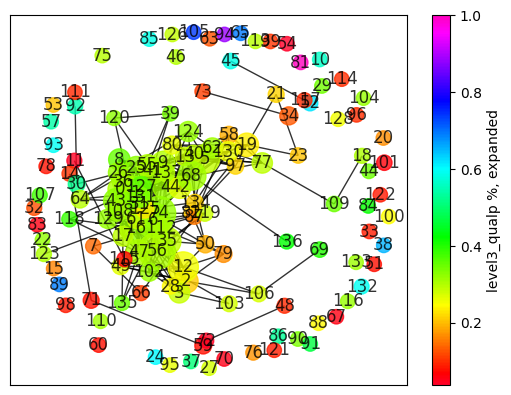

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


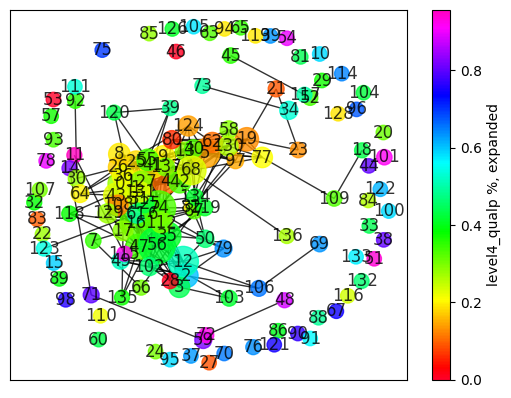

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


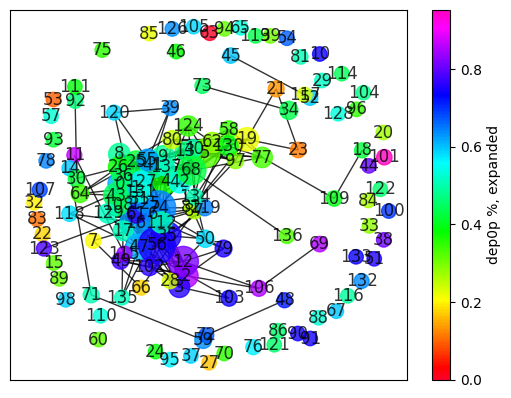

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


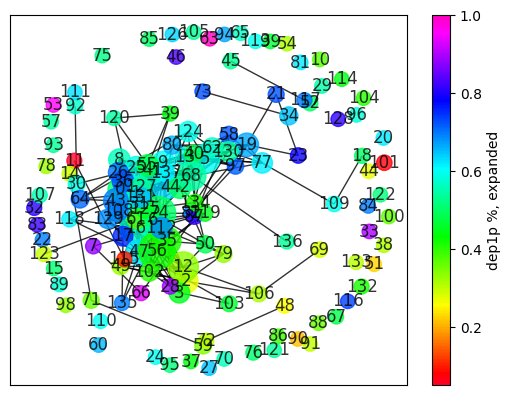

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


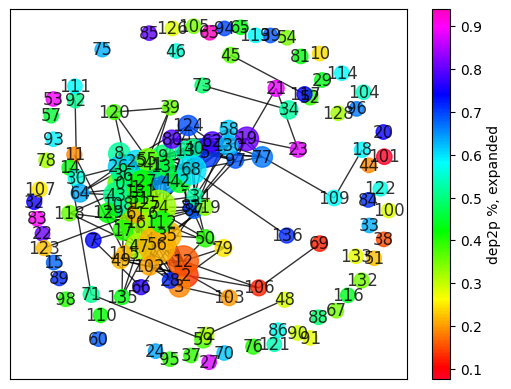

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


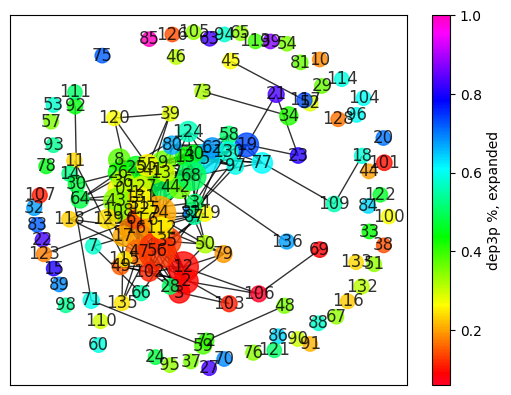

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


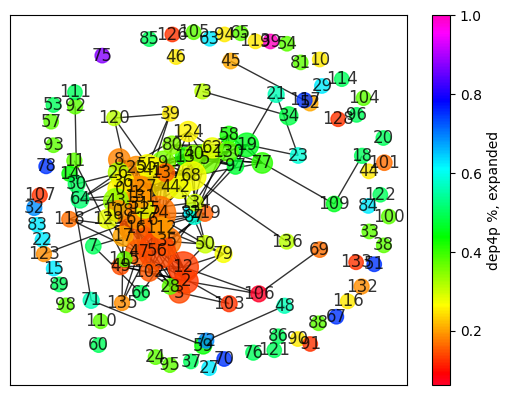

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


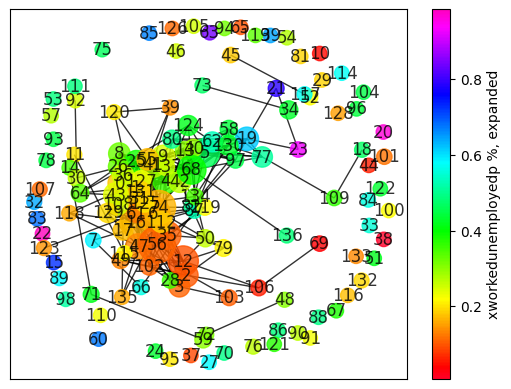

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


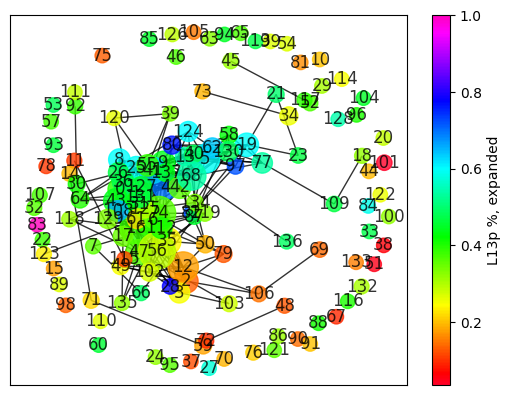

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


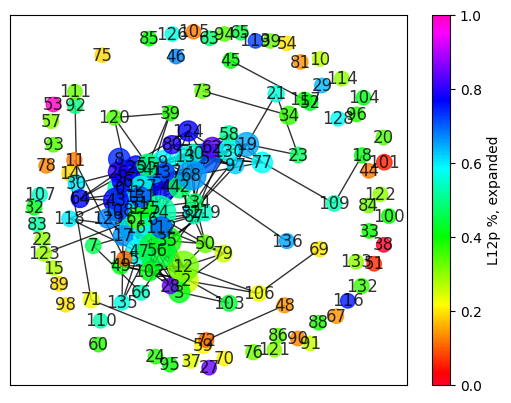

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


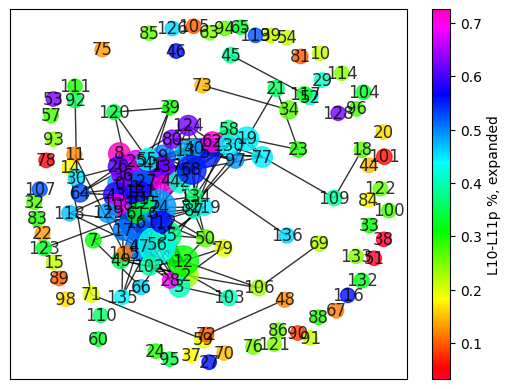

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


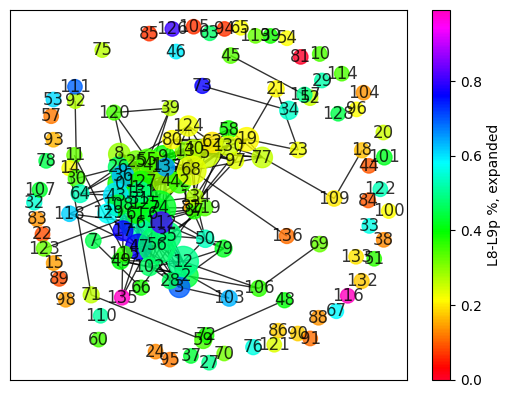

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


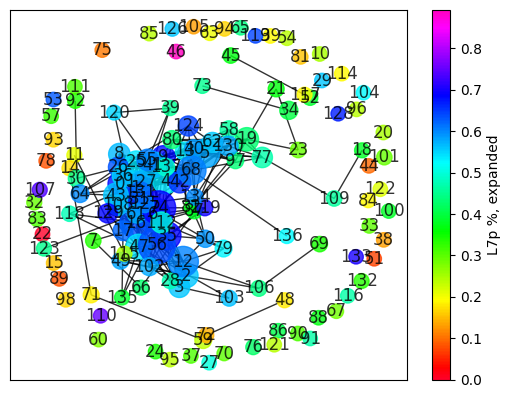

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


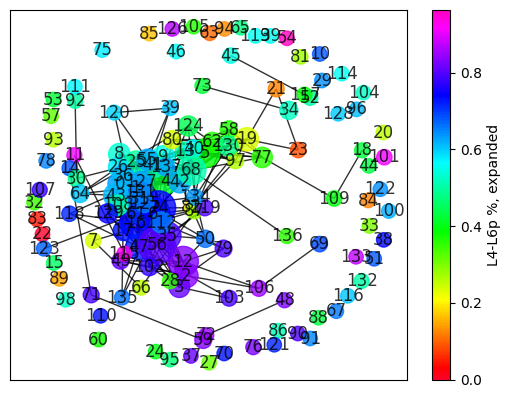

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


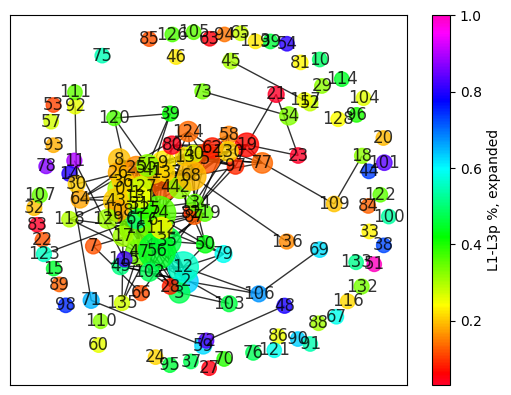

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


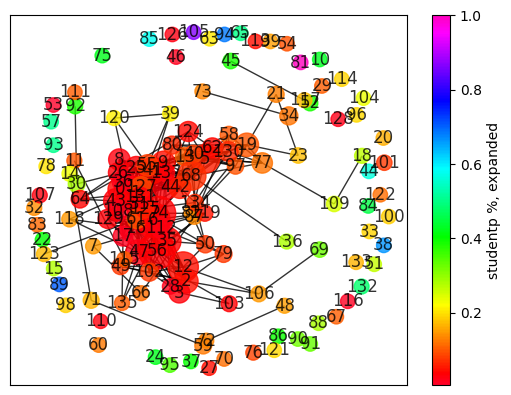

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


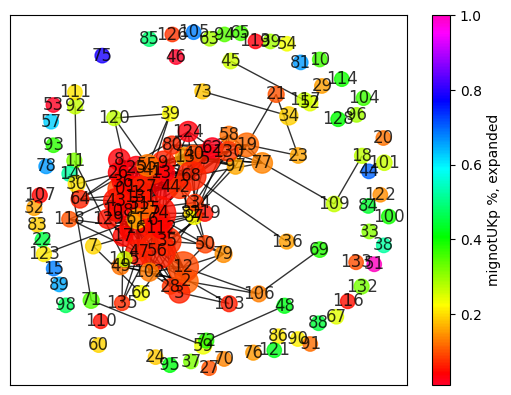

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


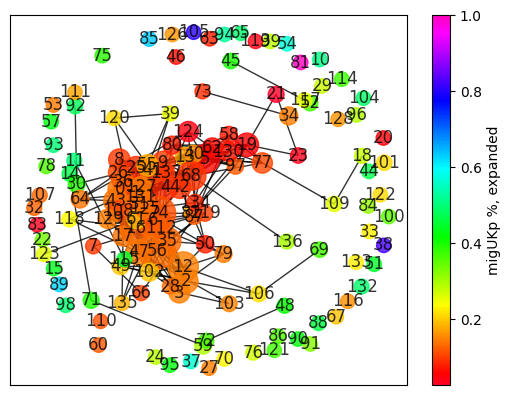

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


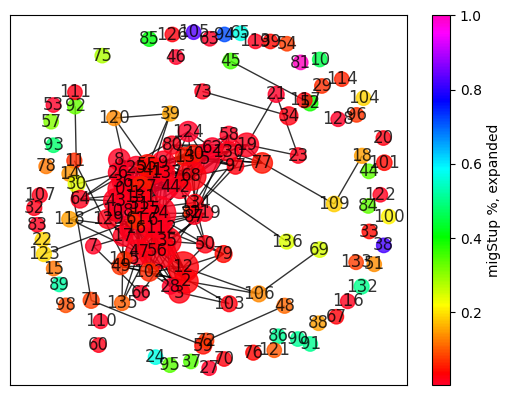

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


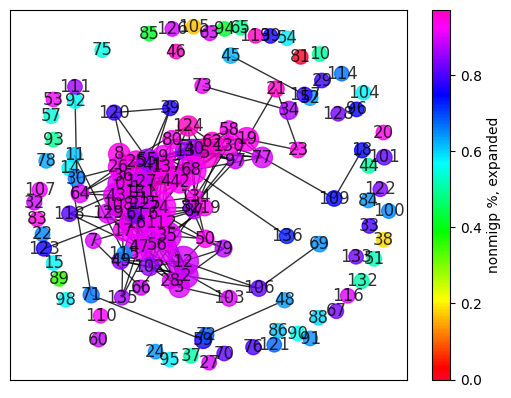

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


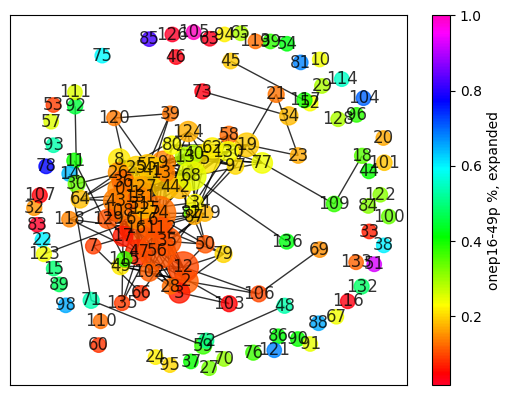

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


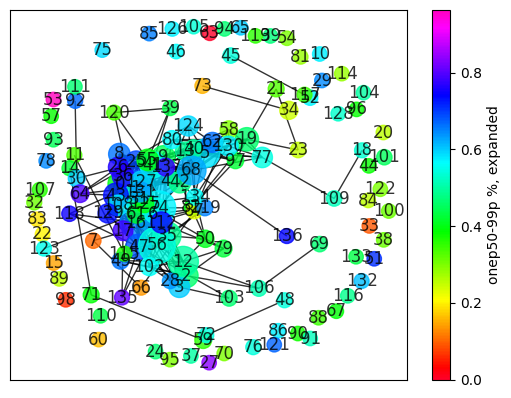

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


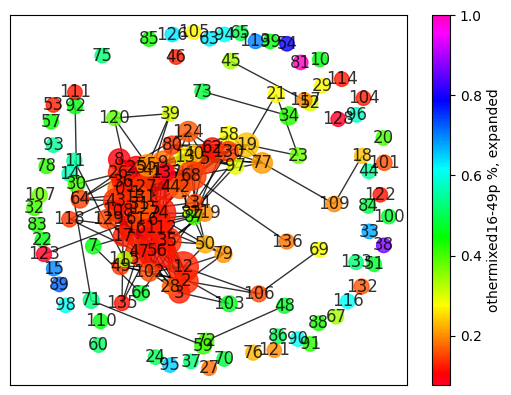

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


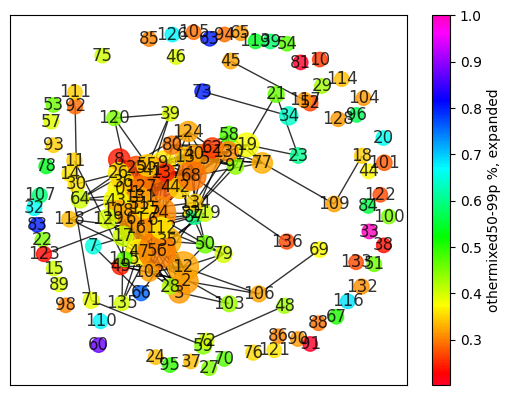

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


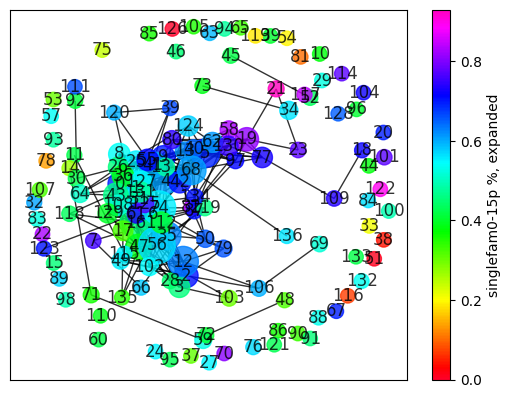

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


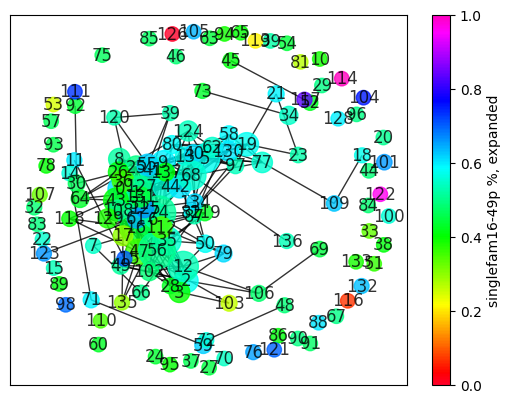

/usr/local/lib/python3.10/dist-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


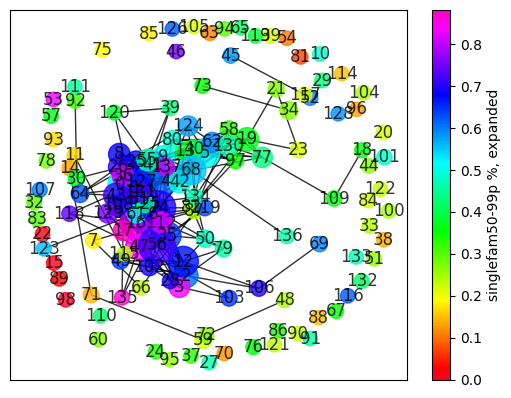

In [ ]:
# Loop through each variable in expanded normalised_adfBM
for column in normalised_adfBM.columns:

    cdfBM = pd.DataFrame(normalised_adfBM[column], columns=[column])

    bm1 = pbm.BallMapper(X=normalised_adfBM, eps=0.5, coloring_df=cdfBM)

    bm1.draw_networkx(coloring_variable=column, color_palette=hsvp,
                      colorbar=True, colorbar_label=f"{column} %, expanded",
                      pos=nx.spring_layout(bm1.Graph, k=0.5, seed=1))

    plt.show()

* Qualification (none, highest):
** Expansion shows more nuanced relationships of Lab/Con areas with higher and lower qualifications.
** no qualification plot shows moderate values in the biggest cluster (green) which are weak Labour/Conservativ-dominant constituencies, and a relatively higher proportion in the other cluster in the bottom right. These are predominantly Labour constituencies, but not necessarily strongholds.
** However, the level 1 qualification plot similarly show high proportions in these concentrated clusters, especially in the second Labour-dominated one.
** This implies that while this Labour dominant shared constituencies have high proportions of no qualifications, there seems to be even higher proportions of voters with the highest qualifications. The Conservative-leaning constituencies seem to have lower proportions of those with higher qualifications.

* Income level (not deprived, most deprived):
** No deprivation plot show higher proportions in the main Conservative-leaning cluster, and moderate levels in the second cluster that is Labour-leaning (yellow-green).
** The expanded deprivation at all levels plot, similar to the original one,  show warmer tones in the concentrated balls. This appear warmest in Conservative-leaning constituencies, while the Labour-leaning cluster show moderate deprivation levels.  

* Employment level (unemployed, routine, highest employment level):
** Main cluster shows relatively low levels of voters who are unemployed. There is slightly higher proportions of routine workers but this still remains on the low end. In these areas there were highest clusters of highest managerial job voters.
** Outlier balls show heterogenous values of employment, but routine employments appear to be more homogenous amongst all, leaning towards low to moderate proportions. The outlier balls for the highest employment level plot also show the most intense colours, indicating that these areas have extreme proportions of those with the highest and lowest employment.

* Migration (International, non-migrant):
** International migrants appear to be lowest across main clusters, and understandably highest proportions of locals.
** The colour intensity for international migrants and locals were almost polar opposites as expected.

* Demographics (One-person under 50, single-families under 50, over 50):
** For the main cluster, these shared constituencies appear to contain the lowest number of younger, one-person household voters, moderate younger single-family households but high proportions of older age groups above 50.